# Load Libraries

In [1]:
import numpy as np
import pandas as pd
import glob,os
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from boruta import BorutaPy
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import silhouette_visualizer
from collections import defaultdict
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import chi2 # chi-squared test
from sklearn.feature_selection import SelectKBest
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

C:\Users\jiekl\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


# Import Data

In [2]:
df = pd.read_csv("Insurance_Data.csv", thousands=',') 
df.columns = df.columns.str.upper()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   AGE                    408 non-null    float64
 1   GENDER                 500 non-null    object 
 2   MARITALSTATUS          358 non-null    object 
 3   SMOKERSTATUS           434 non-null    object 
 4   LIFESTYLE              500 non-null    object 
 5   LANGUAGESPOKEN         500 non-null    object 
 6   HIGHESTEDUCATION       500 non-null    object 
 7   RACE                   385 non-null    object 
 8   NATIONALITY            355 non-null    object 
 9   MALAYSIAPR             500 non-null    object 
 10  MOVINGTONEWCOMPANY     500 non-null    object 
 11  OCCUPATION             355 non-null    object 
 12  TELCO                  500 non-null    object 
 13  HOMEADDRESS            421 non-null    object 
 14  RESIDENTIALTYPE        500 non-null    object 
 15  NOOFDE

## 1.0 Exploratory Data Analysis and Data Pre-Processing

### 1.1 Exploratary Data Analysis

#### 1.1.1 Target Data

In [4]:
#Distribution of cases by customer_need & purchasedplan 
table = pd.crosstab(df['CUSTOMER_NEEDS_1'], df['PURCHASEDPLAN1'])
table.plot(kind='barh', stacked=True)
pd.DataFrame(df['PURCHASEDPLAN1'].value_counts()).reset_index().rename(columns={'PURCHASEDPLAN1': 'COUNT','index':'PURCHASEDPLAN1'})

PURCHASEDPLAN1  COUNT
0    SchoolAgain    294
1      COVIDFree    110
2       HomeSafe     96

PURCHASEDPLAN2  COUNT
0           XEdu    189
1      KidsFlyUp    157
2    NoMoneyDown    154

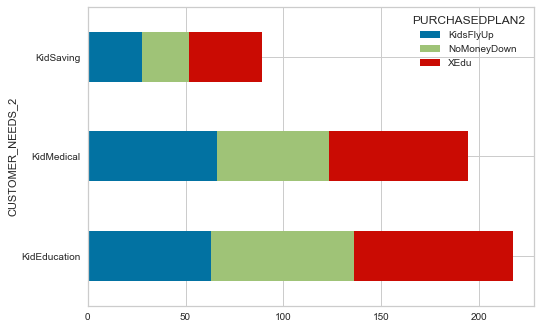

In [5]:
table = pd.crosstab(df['CUSTOMER_NEEDS_2'], df['PURCHASEDPLAN2'])
table.plot(kind='barh', stacked=True)
pd.DataFrame(df['PURCHASEDPLAN2'].value_counts()).reset_index().rename(columns={'PURCHASEDPLAN2': 'COUNT','index':'PURCHASEDPLAN2'})

#### 1.1.2 Bar Plot

In [6]:
categorical_columns = df[['GENDER', 'MARITALSTATUS', 'SMOKERSTATUS', 
                       'LIFESTYLE', 'HIGHESTEDUCATION', 'MOVINGTONEWCOMPANY',
                        'LANGUAGESPOKEN','RACE', "NATIONALITY","MALAYSIAPR","TELCO",
                       'OCCUPATION','RESIDENTIALTYPE','CUSTOMER_NEEDS_1','CUSTOMER_NEEDS_2','PURCHASEDPLAN1','PURCHASEDPLAN2',
                        "MEDICALCOMPLICATION","TRANSPORT",]]
numeric_columns = df[["AGE","NOOFDEPENDENT","FAMILYEXPENSES(MONTH)","ANNUALSALARY"]]
fig,axes = plt.subplots(10,2,figsize=(14,32))
for idx,cat_col in enumerate(categorical_columns):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=df,ax=axes[row,col])
plt.subplots_adjust(hspace=1)

#### 1.1.3 Crosstab

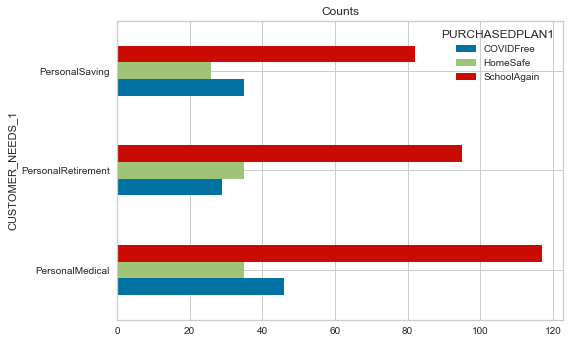

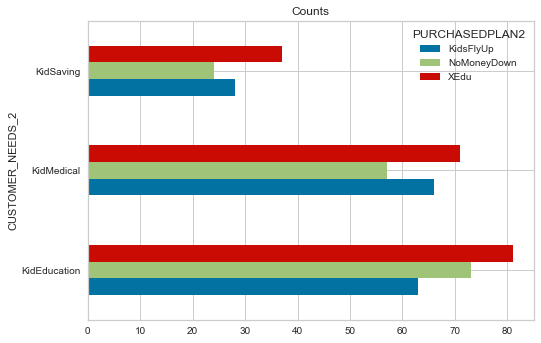

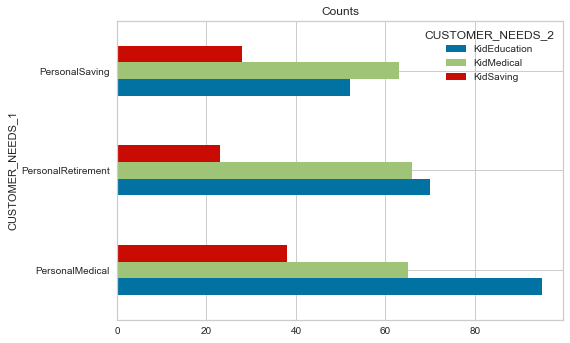

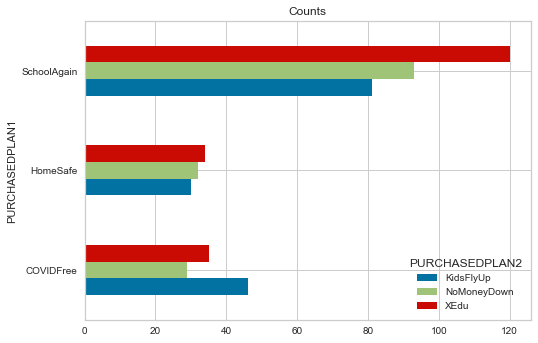

In [7]:
table=pd.crosstab(df['CUSTOMER_NEEDS_1'], df['PURCHASEDPLAN1'])
table.plot(kind='barh', title='Counts')
plt.show()
table=pd.crosstab(df['CUSTOMER_NEEDS_2'], df['PURCHASEDPLAN2'])
table.plot(kind='barh', title='Counts')
plt.show()
table=pd.crosstab(df['CUSTOMER_NEEDS_1'], df['CUSTOMER_NEEDS_2'])
table.plot(kind='barh', title='Counts')
plt.show()
table=pd.crosstab(df['PURCHASEDPLAN1'], df['PURCHASEDPLAN2'])
table.plot(kind='barh', title='Counts')
plt.show()

#### 1.1.4 Barh plot with customer purchasedplan

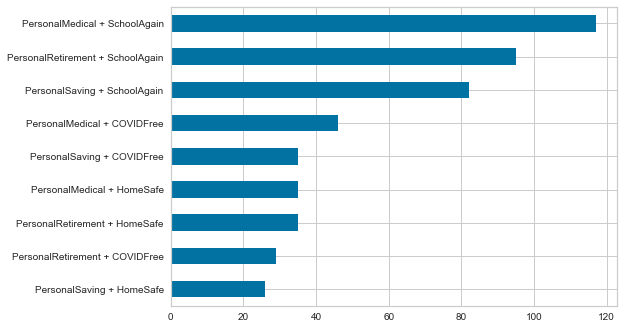

In [8]:
df['CUSTOMER_PURCHASED1'] = df[['CUSTOMER_NEEDS_1', 'PURCHASEDPLAN1']].agg(' + '.join, axis=1)
df['CUSTOMER_PURCHASED1'].value_counts().sort_values(ascending=True).plot(kind="barh")

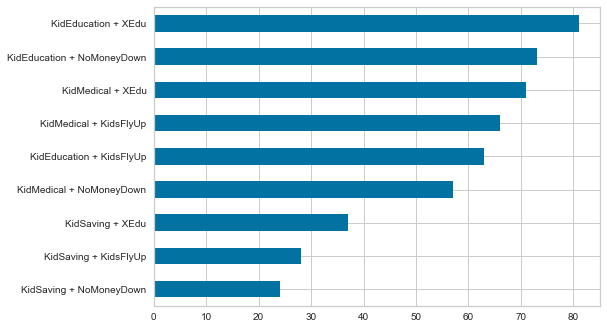

In [9]:
df['CUSTOMER_PURCHASED2'] = df[['CUSTOMER_NEEDS_2', 'PURCHASEDPLAN2']].agg(' + '.join, axis=1)
df['CUSTOMER_PURCHASED2'].value_counts().sort_values(ascending=True).plot(kind="barh")

####  1.1.5 Box plot

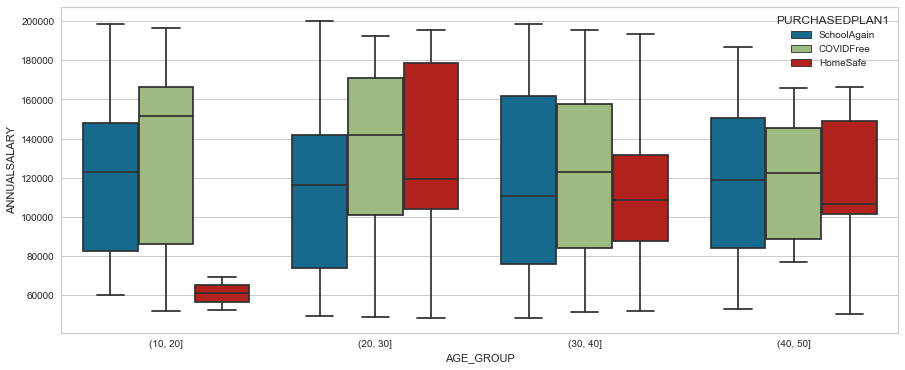

In [10]:
df['AGE_GROUP'] = pd.cut(df['AGE'], bins=[10,20,30,40,50])

fig, ax = plt.subplots(figsize=(15, 6))
sns.boxplot(data=df, x="AGE_GROUP", y="ANNUALSALARY", hue="PURCHASEDPLAN1", ax=ax)

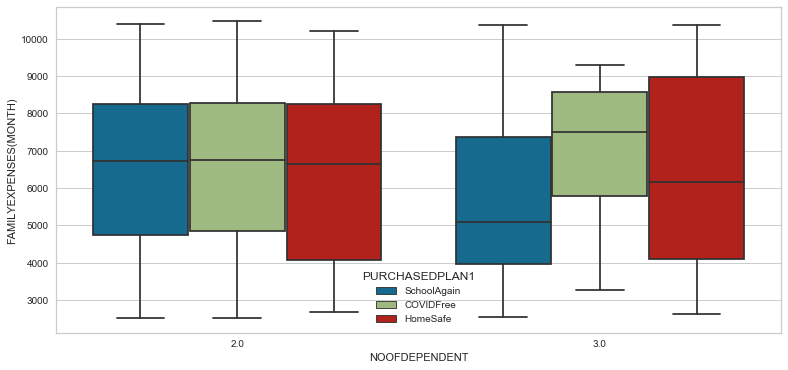

In [11]:
fig, ax = plt.subplots(figsize=(13, 6))
ax = sns.boxplot(x="NOOFDEPENDENT", y="FAMILYEXPENSES(MONTH)", hue="PURCHASEDPLAN1",
                     data=df)

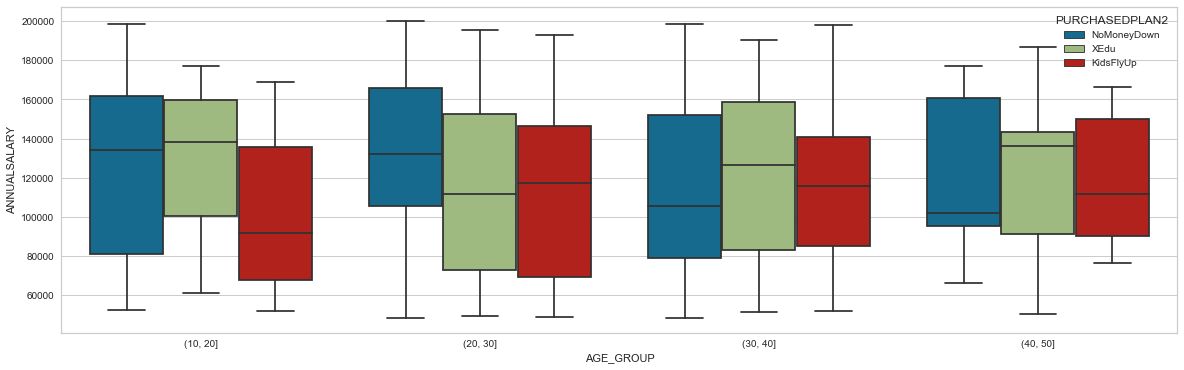

In [12]:
df['AGE_GROUP'] = pd.cut(df['AGE'], bins=[10,20,30,40,50])

fig, ax = plt.subplots(figsize=(20, 6))
sns.boxplot(data=df, x="AGE_GROUP", y="ANNUALSALARY", hue="PURCHASEDPLAN2", ax=ax)

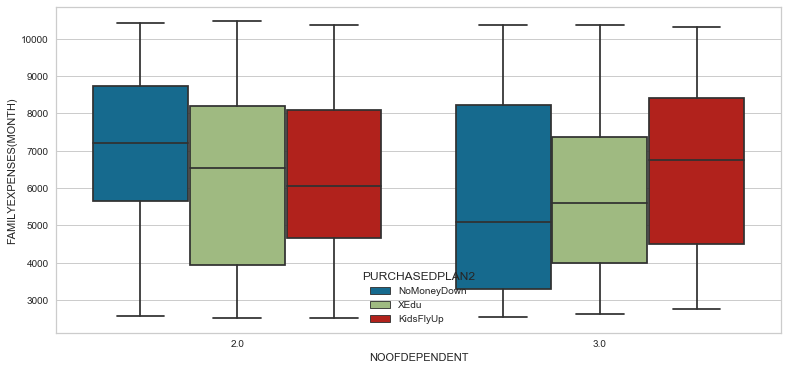

In [13]:
fig, ax = plt.subplots(figsize=(13, 6))
ax = sns.boxplot(x="NOOFDEPENDENT", y="FAMILYEXPENSES(MONTH)", hue="PURCHASEDPLAN2",
                     data=df)

Text(0.5, 1.0, 'PURCHASEDPLAN2 vs FAMILYEXPENSES(MONTH)')

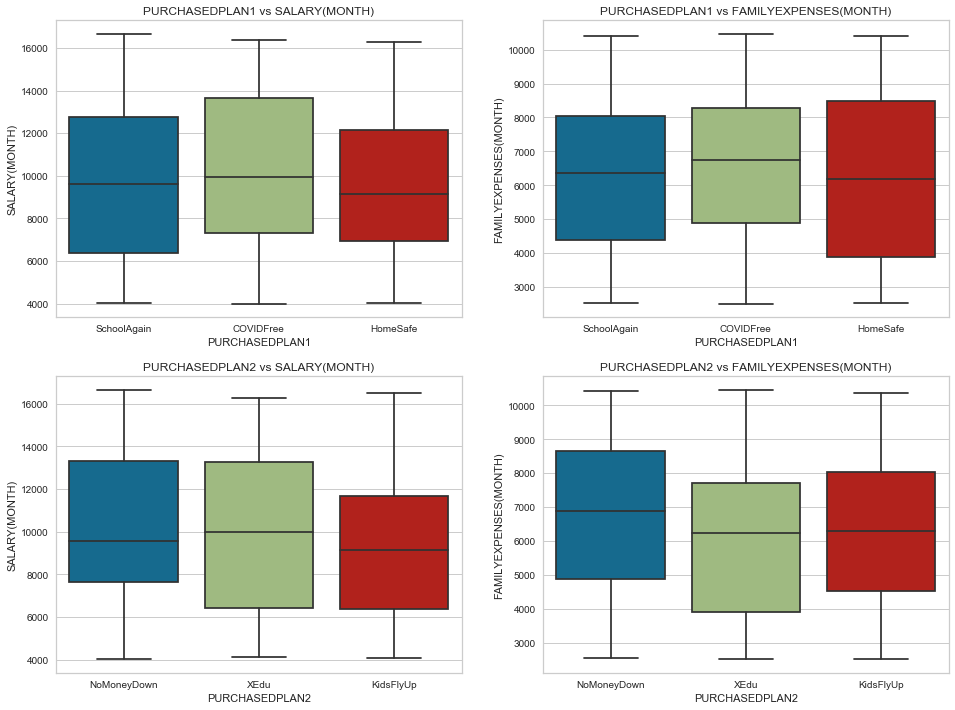

In [14]:
df['SALARY(MONTH)'] = df['ANNUALSALARY']/12

fig, axes = plt.subplots(2,2, figsize=(16,12))
a = sns.boxplot(x='PURCHASEDPLAN1', y='SALARY(MONTH)', data=df, ax=axes[0][0])
a.set_title('PURCHASEDPLAN1 vs SALARY(MONTH)')
b = sns.boxplot(x='PURCHASEDPLAN1', y='FAMILYEXPENSES(MONTH)', data=df, ax=axes[0][1])
b.set_title('PURCHASEDPLAN1 vs FAMILYEXPENSES(MONTH)')
c = sns.boxplot(x='PURCHASEDPLAN2', y='SALARY(MONTH)', data=df, ax=axes[1][0])
c.set_title('PURCHASEDPLAN2 vs SALARY(MONTH)')
d = sns.boxplot(x='PURCHASEDPLAN2', y='FAMILYEXPENSES(MONTH)', data=df, ax=axes[1][1])
d.set_title('PURCHASEDPLAN2 vs FAMILYEXPENSES(MONTH)')

### 1.2 Pre-processing

In [15]:
df2 = df.copy()
df2.drop(["CUSTOMER_PURCHASED2","CUSTOMER_PURCHASED1"],1,inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   AGE                    408 non-null    float64 
 1   GENDER                 500 non-null    object  
 2   MARITALSTATUS          358 non-null    object  
 3   SMOKERSTATUS           434 non-null    object  
 4   LIFESTYLE              500 non-null    object  
 5   LANGUAGESPOKEN         500 non-null    object  
 6   HIGHESTEDUCATION       500 non-null    object  
 7   RACE                   385 non-null    object  
 8   NATIONALITY            355 non-null    object  
 9   MALAYSIAPR             500 non-null    object  
 10  MOVINGTONEWCOMPANY     500 non-null    object  
 11  OCCUPATION             355 non-null    object  
 12  TELCO                  500 non-null    object  
 13  HOMEADDRESS            421 non-null    object  
 14  RESIDENTIALTYPE        500 non-null    obj

#### 1.2.1 Filling NaN Values

In [16]:
df2["AGE"] = df2['AGE'].fillna(round(df2["AGE"].mean(),0))
df2['NOOFDEPENDENT'] = df2['NOOFDEPENDENT'].fillna(round(df2["NOOFDEPENDENT"].mean(),0))
df2["FAMILYEXPENSES(MONTH)"] = df2["FAMILYEXPENSES(MONTH)"].fillna(df2.groupby("RESIDENTIALTYPE")['FAMILYEXPENSES(MONTH)'].transform('mean'))
df2["ANNUALSALARY"] = df2["ANNUALSALARY"].fillna(df2.groupby("RESIDENTIALTYPE")['ANNUALSALARY'].transform('mean'))
df2["SALARY(MONTH)"] = df2["SALARY(MONTH)"].fillna(df2.groupby("RESIDENTIALTYPE")['SALARY(MONTH)'].transform('mean'))

categorical_columns_mask = df2.dtypes==object
categorical_columns = df2.columns[categorical_columns_mask].tolist()
categorical_columns

for col_name in categorical_columns:
    df2[col_name].fillna('NotSpecified', inplace=True)

#Do not fill the categorical at the end, due to we cannot cimply fill it and it will reduce the accuracy as well
#df2['MARITALSTATUS'].value_counts()
#0.43 S, 0.57 m
#df2['MARITALSTATUS'] = df2['MARITALSTATUS'].fillna(pd.Series(np.random.choice(['single','married'], 
                                                      #p=[0.43,0.57], size=len(df))))
#df2['SMOKERSTATUS'].value_counts()
#0.48 f, 0.29 s, 0.23 o
#df2['SMOKERSTATUS'] = df2['SMOKERSTATUS'].fillna(pd.Series(np.random.choice(['frequent','sometimes','once_in_a_while'], 
                                                      #p=[0.48,0.29,0.23], size=len(df2))))
#df2['OCCUPATION'].value_counts()
#0.41 pe, 0.31 gs, 0.18 se, 0.10 e
#df2['OCCUPATION'] = df2['OCCUPATION'].fillna(pd.Series(np.random.choice(['privateEemployee','govServant','selfEmployed','employer'], 
                                                      #p=[0.41,0.31,0.18,0.1], size=len(df2))))
df2.head()
df2.transpose()

0                   1                 2    \
AGE                                35                  25                27   
GENDER                         female                male              male   
MARITALSTATUS                  single        NotSpecified      NotSpecified   
SMOKERSTATUS             NotSpecified        NotSpecified          frequent   
LIFESTYLE                        home             outdoor          pub_goer   
LANGUAGESPOKEN                english               malay           english   
HIGHESTEDUCATION             Bachelor             Diploma          Bachelor   
RACE                            malay             chinese            others   
NATIONALITY              NotSpecified           Malaysian      NotSpecified   
MALAYSIAPR                        yes                  no                no   
MOVINGTONEWCOMPANY                yes                 yes                no   
OCCUPATION                   employer        selfEmployed  privateEemployee   
TELCO                           maxis             umobile            celcom   
HOMEADDRESS                 north_mal            east_mal       central_mal   
RESIDENTIALTYPE               terrace             terrace       condominium   
NOOFDEPENDENT                       2                   2                 2   
FAMILYEXPENSES(MONTH)           10242             6334.57              4316   
ANNUALSALARY                   119041               73926            140734   
CUSTOMER_NEEDS_1       PersonalSaving  PersonalRetirement   PersonalMedical   
CUSTOMER_NEEDS_2           KidMedical          KidMedical        KidMedical   
PURCHASEDPLAN1            SchoolAgain         SchoolAgain       SchoolAgain   
TRANSPORT                     driving             driving           driving   
PURCHASEDPLAN2            NoMoneyDown                XEdu         KidsFlyUp   
MEDICALCOMPLICATION                no                 yes               yes   
AGE_GROUP                (30.0, 40.0]        (20.0, 30.0]      (20.0, 30.0]   
SALARY(MONTH)                 9920.06              6160.5           11727.8   

                                    3                   4    \
AGE                                  33                  28   
GENDER                           female              female   
MARITALSTATUS              NotSpecified        NotSpecified   
SMOKERSTATUS            once_in_a_while     once_in_a_while   
LIFESTYLE                      pub_goer                home   
LANGUAGESPOKEN                  english             english   
HIGHESTEDUCATION               Bachelor            Bachelor   
RACE                              malay             chinese   
NATIONALITY                   Malaysian           Malaysian   
MALAYSIAPR                          yes                 yes   
MOVINGTONEWCOMPANY                   no                 yes   
OCCUPATION             privateEemployee    privateEemployee   
TELCO                             maxis             umobile   
HOMEADDRESS                   south_mal            east_mal   
RESIDENTIALTYPE                 terrace         condominium   
NOOFDEPENDENT                         2                   2   
FAMILYEXPENSES(MONTH)              4845                9883   
ANNUALSALARY                     119041               98833   
CUSTOMER_NEEDS_1         PersonalSaving  PersonalRetirement   
CUSTOMER_NEEDS_2              KidSaving        KidEducation   
PURCHASEDPLAN1              SchoolAgain           COVIDFree   
TRANSPORT                       driving             driving   
PURCHASEDPLAN2              NoMoneyDown           KidsFlyUp   
MEDICALCOMPLICATION                  no                 yes   
AGE_GROUP                  (30.0, 40.0]        (20.0, 30.0]   
SALARY(MONTH)                   9920.06             8236.08   

                                      5                6                 7    \
AGE                                    44               35                31   
GENDER                               m

In [17]:
df2.isna().sum()

AGE                       0
GENDER                    0
MARITALSTATUS             0
SMOKERSTATUS              0
LIFESTYLE                 0
LANGUAGESPOKEN            0
HIGHESTEDUCATION          0
RACE                      0
NATIONALITY               0
MALAYSIAPR                0
MOVINGTONEWCOMPANY        0
OCCUPATION                0
TELCO                     0
HOMEADDRESS               0
RESIDENTIALTYPE           0
NOOFDEPENDENT             0
FAMILYEXPENSES(MONTH)     0
ANNUALSALARY              0
CUSTOMER_NEEDS_1          0
CUSTOMER_NEEDS_2          0
PURCHASEDPLAN1            0
TRANSPORT                 0
PURCHASEDPLAN2            0
MEDICALCOMPLICATION       0
AGE_GROUP                92
SALARY(MONTH)             0
dtype: int64

#### 1.2.2 Label Encoding

In [18]:
dfle = df2.copy()
le = LabelEncoder()
d = defaultdict(LabelEncoder)
dfle[categorical_columns] = dfle[categorical_columns].apply(lambda x: d[x.name].fit_transform(x))

#### 1.2.3 Normalization

In [19]:
#Data transform for the numeric data, salaries 
min_max_scaler = MinMaxScaler()
dfle[["FAMILYEXPENSES(MONTH)", "ANNUALSALARY", "SALARY(MONTH)"]] = min_max_scaler.fit_transform(dfle[["FAMILYEXPENSES(MONTH)", "ANNUALSALARY","SALARY(MONTH)"]])

In [20]:
#Inverse Transform
#dfle[categorical_columns] = dfle[categorical_columns].apply(lambda x: d[x.name].inverse_transform(x))
#dfle.head()

In [21]:
#We tend to use the original dataset to check the correlation
dfle
dfle = dfle.drop(['AGE_GROUP',"SALARY(MONTH)"],axis=1)

### 1.3 Correlation Plot

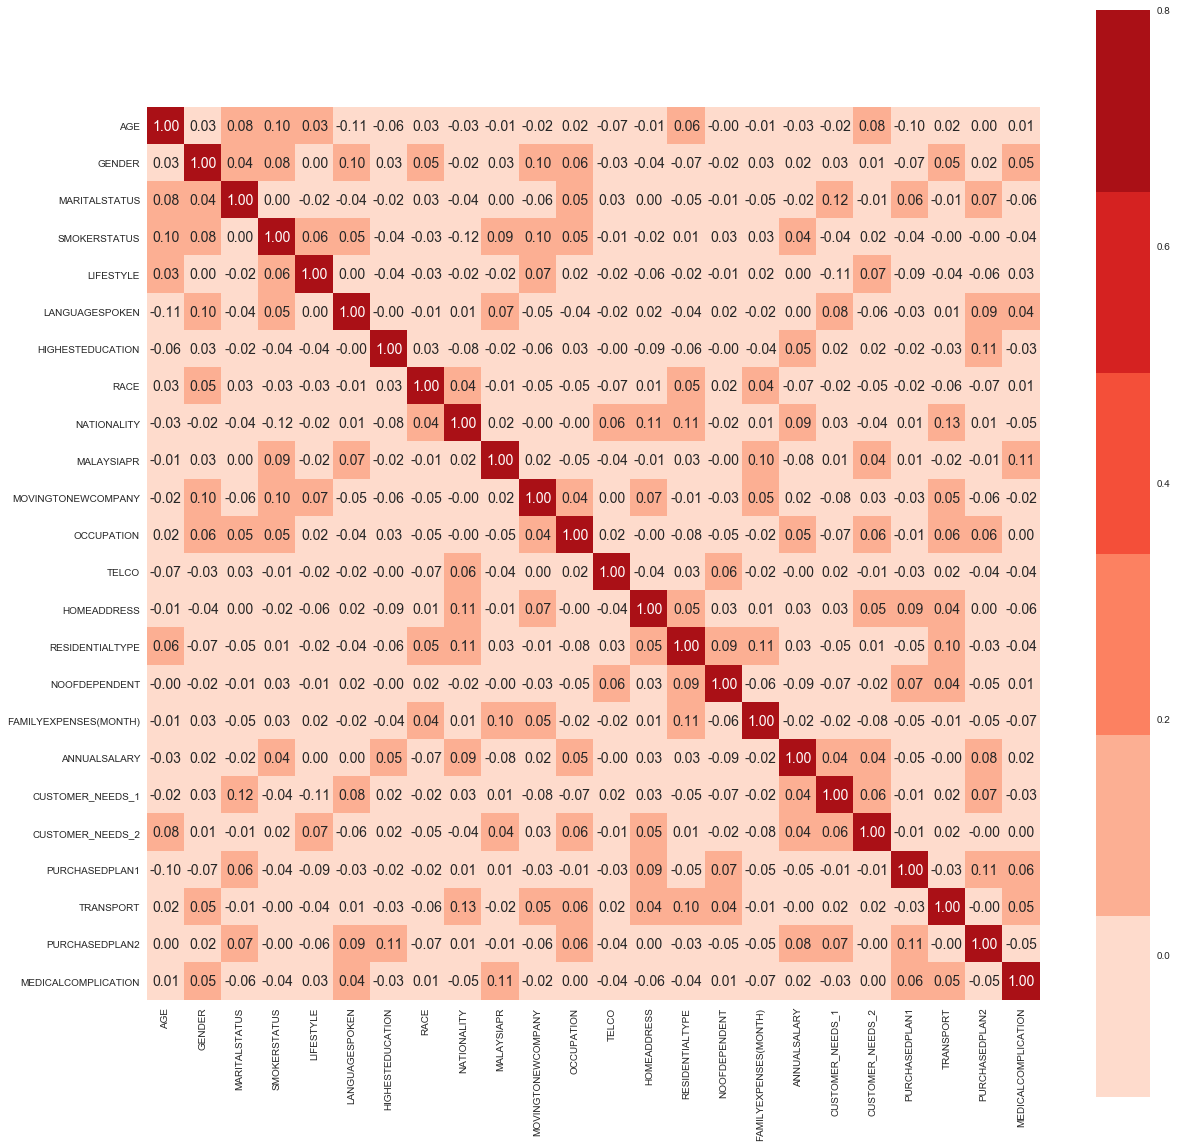

In [22]:
dfle
corr = dfle.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, vmax=.8, square=True, annot=True, fmt= '.2f',
           annot_kws={'size': 14}, cmap=sns.color_palette("Reds"))

### 1.4 Data Imbalanced Treatment

#### 1.4.1 Imbalanced Treatment for PurchasedPlan1

In [23]:
df["PURCHASEDPLAN1"].value_counts().plot(kind='bar')

In [24]:
X = dfle.drop("PURCHASEDPLAN1", 1)
y = dfle["PURCHASEDPLAN1"]
features = X.columns
os = SMOTE(sampling_strategy="not majority", k_neighbors=5,random_state=10)
X_train, X_test, y_train, y_test = train_test_split(X,y.values.ravel(), test_size = 0.2, random_state=7)
X,y = os.fit_resample(X_train,y_train)
X = pd.DataFrame(data=X,columns=features)
y = pd.DataFrame(data=y,columns=['PURCHASEDPLAN1'])
y["PURCHASEDPLAN1"].value_counts().plot(kind="bar")
plt.title("PURCHASEDPLAN1")
print(y["PURCHASEDPLAN1"].value_counts())
y = pd.Series(y['PURCHASEDPLAN1'].values)

2    241
1    241
0    241
Name: PURCHASEDPLAN1, dtype: int64


In [25]:
#Heat Map After Oversampling
#corr_matrix  = X.corr().abs()
#plt.figure(figsize=(30,30))
#sns.heatmap(corr_matrix, vmax=.8,
#           square=True, annot=True,
#           fmt= '.2f', annot_kws={'size':15},
#           cmap=sns.color_palette("Reds"))

#### 1.4.2 Imbalanced Treatment for PurchasedPlan2

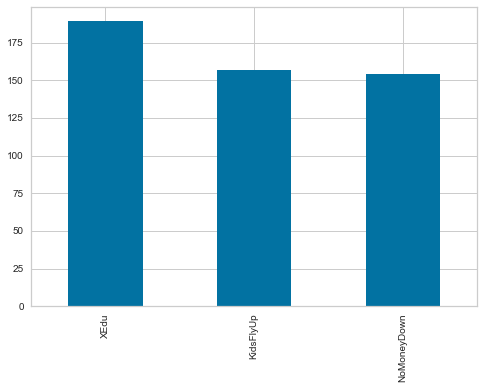

In [26]:
df["PURCHASEDPLAN2"].value_counts().plot(kind='bar')

In [27]:
X2 = dfle.drop("PURCHASEDPLAN2", 1)
y2 = dfle["PURCHASEDPLAN2"]
features = X2.columns
os = SMOTE(sampling_strategy="not majority", k_neighbors=5, random_state=10)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2.values.ravel(), test_size = 0.1, random_state=7)
X2,y2 = os.fit_resample(X_train2,y_train2)
X2 = pd.DataFrame(data=X2,columns=features)
y2 = pd.DataFrame(data=y2,columns=['PURCHASEDPLAN2'])
y2["PURCHASEDPLAN2"].value_counts().plot(kind="bar")
plt.title("PURCHASEDPLAN2")
print(y2["PURCHASEDPLAN2"].value_counts())
y2 = pd.Series(y2['PURCHASEDPLAN2'].values)

2    167
1    167
0    167
Name: PURCHASEDPLAN2, dtype: int64


In [28]:
#Heat Map After Oversampling
#corr_matrix  = X2.corr().abs()
#plt.figure(figsize=(30,30))
#sns.heatmap(corr_matrix, vmax=.8,
#           square=True, annot=True,
#           fmt= '.2f', annot_kws={'size':15},
#           cmap=sns.color_palette("Reds"))

In [29]:
#Inverse Transform
ydf = y.to_frame()
ydf.rename(columns={0: "PURCHASEDPLAN1"},inplace=True)
XmergedDf = X.merge(ydf, left_index=True, right_index=True)
XmergedDf[categorical_columns] = XmergedDf[categorical_columns].apply(lambda x: d[x.name].inverse_transform(x))
ydf2 = y2.to_frame()
ydf2.rename(columns={0: "PURCHASEDPLAN2"},inplace=True)
XmergedDf2 = X2.merge(ydf2, left_index=True, right_index=True)
XmergedDf2[categorical_columns] = XmergedDf2[categorical_columns].apply(lambda x: d[x.name].inverse_transform(x))

In [30]:
#Compare back to the original bar plot
categorical_columns_smote = XmergedDf[['GENDER', 'MARITALSTATUS', 
                       'LIFESTYLE', 'MOVINGTONEWCOMPANY']]
numeric_columns = XmergedDf[["AGE","NOOFDEPENDENT","FAMILYEXPENSES(MONTH)","ANNUALSALARY"]]
fig,axes = plt.subplots(2,2,figsize=(10,15))
for idx,cat_col in enumerate(categorical_columns_smote):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=XmergedDf,ax=axes[row,col])

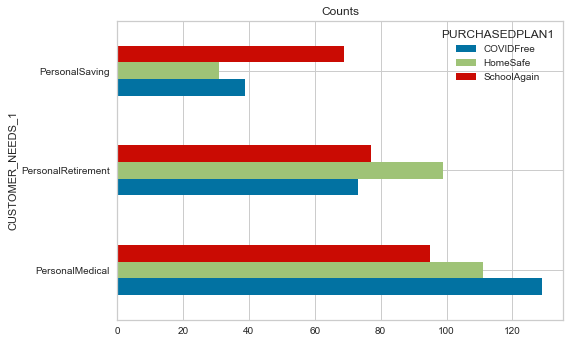

In [31]:
table=pd.crosstab(XmergedDf['CUSTOMER_NEEDS_1'], XmergedDf['PURCHASEDPLAN1'])
table.plot(kind='barh', title='Counts')
plt.show()

In [32]:
table=pd.crosstab(XmergedDf['CUSTOMER_NEEDS_2'], XmergedDf['PURCHASEDPLAN2'])
table.plot(kind='barh', title='Counts')
plt.show()

### THIS PART IS TO CHECK THE ACCURACY IF WE DO NOT SMOTE THE DATASET
#### MIGHT BE IGNORE

In [33]:
df_nosmote = df2.copy()
df_nosmote

AGE  GENDER MARITALSTATUS     SMOKERSTATUS LIFESTYLE LANGUAGESPOKEN  \
0    35.0  female        single     NotSpecified      home        english   
1    25.0    male  NotSpecified     NotSpecified   outdoor          malay   
2    27.0    male  NotSpecified         frequent  pub_goer        english   
3    33.0  female  NotSpecified  once_in_a_while  pub_goer        english   
4    28.0  female  NotSpecified  once_in_a_while      home        english   
..    ...     ...           ...              ...       ...            ...   
495  31.0  female       married         frequent   outdoor        english   
496  26.0    male       married         frequent      home        english   
497  19.0  female  NotSpecified         frequent      home          malay   
498  41.0    male  NotSpecified  once_in_a_while  pub_goer          malay   
499  39.0    male        single        sometimes      home          malay   

    HIGHESTEDUCATION          RACE   NATIONALITY MALAYSIAPR  ...  \
0           Bachelor         malay  NotSpecified        yes  ...   
1            Diploma       chinese     Malaysian         no  ...   
2           Bachelor        others  NotSpecified         no  ...   
3           Bachelor         malay     Malaysian        yes  ...   
4           Bachelor       chinese     Malaysian        yes  ...   
..               ...           ...           ...        ...  ...   
495          Diploma  NotSpecified  NotSpecified        yes  ...   
496         Bachelor        others  NotSpecified         no  ...   
497          Diploma        others  NotSpecified        yes  ...   
498         Bachelor        indian     Malaysian        yes  ...   
499         Bachelor       chinese  NotSpecified        yes  ...   

    FAMILYEXPENSES(MONTH)   ANNUALSALARY    CUSTOMER_NEEDS_1 CUSTOMER_NEEDS_2  \
0             10242.00000  119040.678571      PersonalSaving       KidMedical   
1              6334.57265   73926.000000  PersonalRetirement       KidMedical   
2              4316.00000  140734.000000     PersonalMedical       KidMedical   
3              4845.00000  119040.678571      PersonalSaving        KidSaving   
4              9883.00000   98833.000000  PersonalRetirement     KidEducation   
..                    ...            ...                 ...              ...   
495            4831.00000  119040.678571  PersonalRetirement       KidMedical   
496            7455.00000   65384.000000     PersonalMedical     KidEducation   
497            3329.00000   51962.000000      PersonalSaving     KidEducation   
498            9300.00000  119040.678571  PersonalRetirement        KidSaving   
499            7500.00000  115332.400000  PersonalRetirement     KidEducation   

    PURCHASEDPLAN1  TRANSPORT  PURCHASEDPLAN2  MEDICALCOMPLICATION  \
0      SchoolAgain    driving     NoMoneyDown                   no   
1      SchoolAgain    driving            XEdu                  yes   
2      SchoolAgain    driving       KidsFlyUp                  yes   
3      SchoolAgain    driving     NoMoneyDown                   no   
4        COVIDFree    driving       KidsFlyUp                  yes   
..             ...        ...             ...                  ...   
495       HomeSafe    driving       KidsFlyUp                  yes   
496    SchoolAgain    driving       KidsFlyUp                   no   
497      COVIDFree    driving       KidsFlyUp                   no   
498      COVIDFree    driving       KidsFlyUp                   no   
499       HomeSafe    driving       KidsFlyUp                   no   

        AGE_GROUP SALARY(MONTH)  
0    (30.0, 40.0]   9920.056548  
1    (20.0, 30.0]   6160.500000  
2    (20.0, 30.0]  11727.833333  
3    (30.0, 40.0]   9920.056548  
4    (20.0, 30.0]   8236.083333  
..            ...           ...  
495           NaN   9920.056548  
496  (20.0, 30.0]   5448.666667  
497  (10.0, 20.0]   4330.166667  
498  (40.0, 50.0]   9920.056548  
499  (30.0, 40.0]   9611.033333  

[500 rows x 26 columns]

In [34]:
le = LabelEncoder()
d = defaultdict(LabelEncoder)
df_nosmote[categorical_columns] = df_nosmote[categorical_columns].apply(lambda x: d[x.name].fit_transform(x))

In [35]:
X3 = df_nosmote.drop("PURCHASEDPLAN1", 1)
y3 = df_nosmote["PURCHASEDPLAN1"]

In [36]:
X3.drop(["AGE_GROUP","SALARY(MONTH)"],1,inplace=True)

## 2.0 Feature Selection 

Feature selection is the process of reducing the number of input variables when developing a predictive model, in some cases, to improve the performance of the model as well.

Supervised: 
Use the target variable.
Wrapper: Search for well-performing subsets of features.
RFE

### 2.1 Feature Selection for X (PURCHASEDPLAN1)

#### 2.1.1 Boruta

In [37]:
print(X.shape)
print(y.shape)
print(X2.shape)
print(y2.shape)
print(X3.shape)
print(y3.shape)

(723, 23)
(723,)
(501, 23)
(501,)
(500, 23)
(500,)


In [38]:
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

In [39]:
#Boruta
rf = RandomForestClassifier(n_jobs=-1, class_weight="balanced", max_depth = 5)
feat_selector = BorutaPy(rf, n_estimators=100, random_state = 6)
feat_selector.fit(X.values, y.values.ravel())
colnames = X.columns
boruta_score = ranking(list(map(float, feat_selector.ranking_)), colnames, order=-1)
boruta_score = pd.DataFrame(list(boruta_score.items()), columns=['Features', 'Score'])
boruta_score = boruta_score.sort_values("Score", ascending = False)

In [40]:
print("Using the smote dataset for Feature Selection")
print('---------Top 5----------')
display(boruta_score.head(5))
print('---------Bottom 5----------')
boruta_score.tail(5)

Using the smote dataset for Feature Selection
---------Top 5----------


Features  Score
0                     AGE    1.0
3            SMOKERSTATUS    1.0
21         PURCHASEDPLAN2    1.0
17           ANNUALSALARY    1.0
16  FAMILYEXPENSES(MONTH)    1.0

---------Bottom 5----------


Features  Score
8          NATIONALITY   0.20
6     HIGHESTEDUCATION   0.13
1               GENDER   0.07
10  MOVINGTONEWCOMPANY   0.00
20           TRANSPORT   0.00

Text(0.5, 1, 'Boruta Top 20 Features')

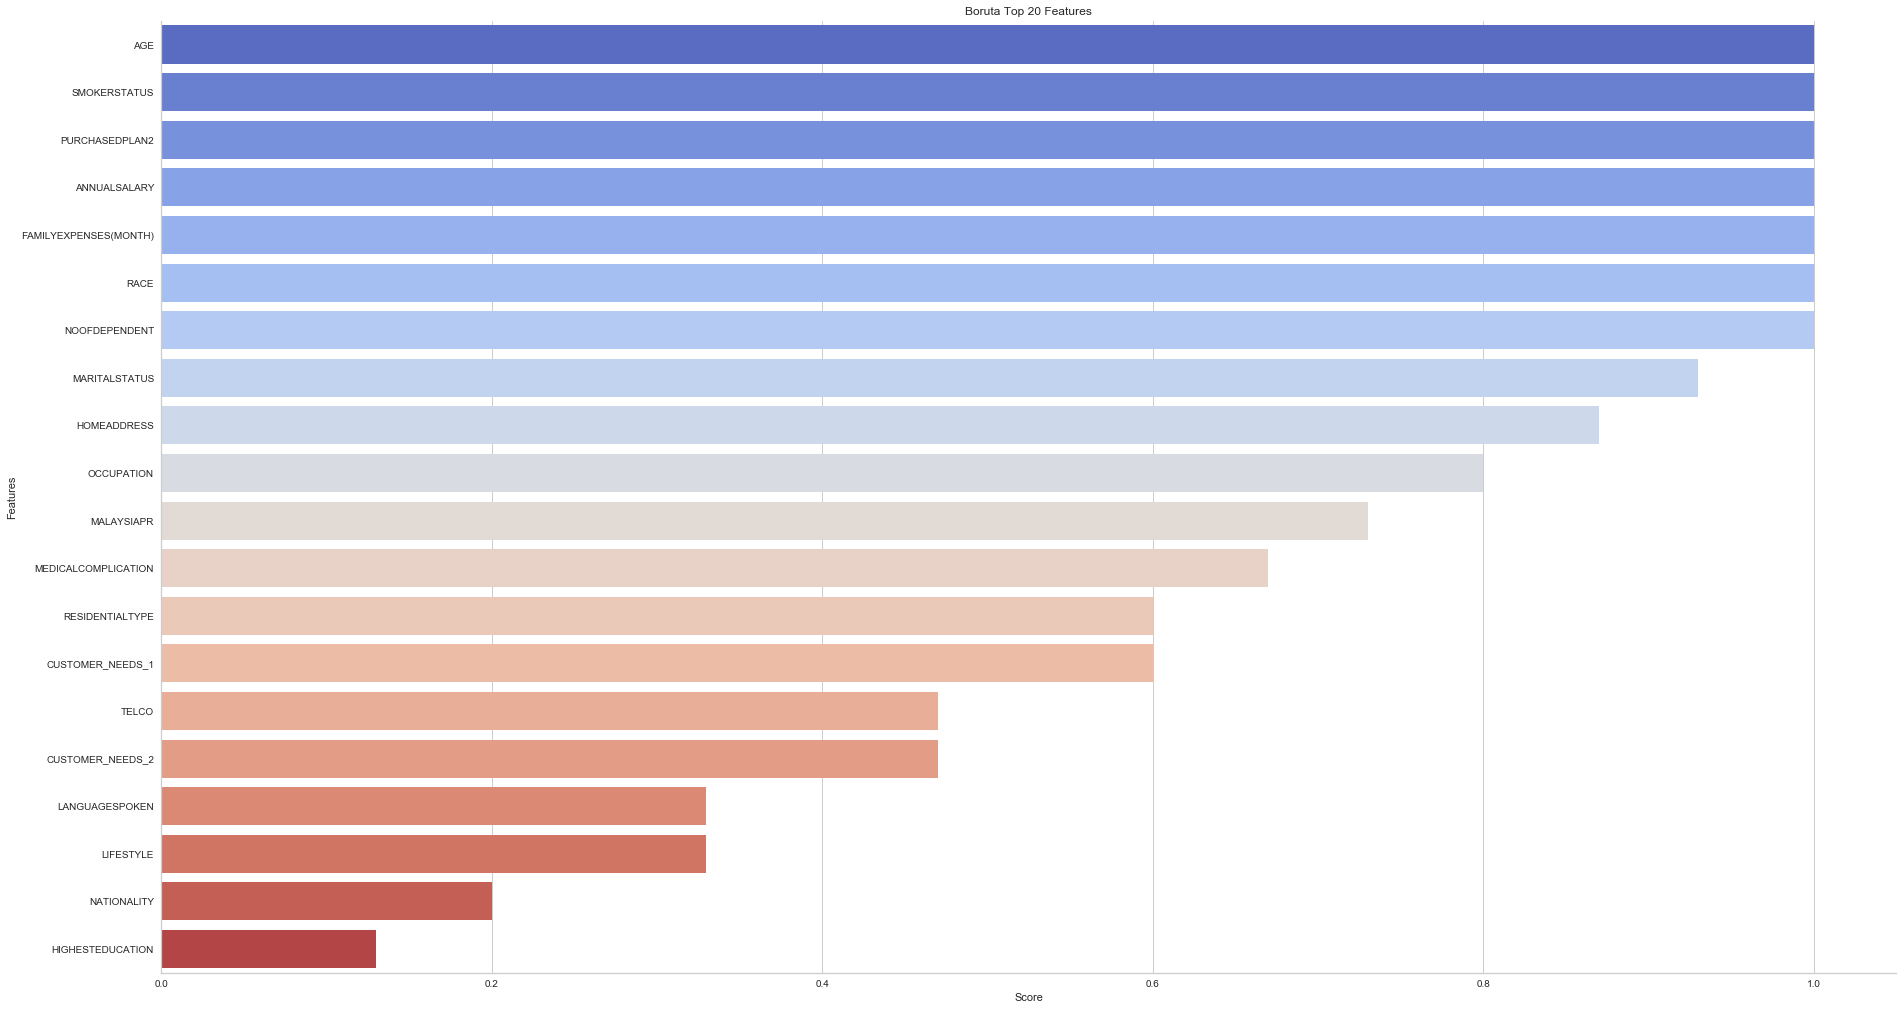

In [41]:
sns_boruta_plot = sns.catplot(x="Score", y="Features", data = boruta_score[0:20], kind = "bar", 
               height=14, aspect=1.9, palette='coolwarm')
plt.title("Boruta Top 20 Features")

### 2.1.2 RFE

In [42]:
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=10, n_estimators=100, random_state=10)
rf.fit(X, y)
rfe = RFECV(rf, min_features_to_select=1, cv=3)
rfe.fit(X,y)
rfe_score = ranking(list(map(float, rfe.ranking_)), colnames, order=-1)
rfe_score = pd.DataFrame(list(rfe_score.items()), columns=['Features','Score'])
rfe_score = rfe_score.sort_values("Score",ascending = False)
print('---------Top 5----------')
display(rfe_score.head(5))
print('---------Bottom 5----------')
rfe_score.tail(5)

---------Top 5----------


Features  Score
0                AGE    1.0
1             GENDER    1.0
21    PURCHASEDPLAN2    1.0
19  CUSTOMER_NEEDS_2    1.0
18  CUSTOMER_NEEDS_1    1.0

---------Bottom 5----------


Features  Score
3          SMOKERSTATUS    1.0
2         MARITALSTATUS    1.0
22  MEDICALCOMPLICATION    1.0
10   MOVINGTONEWCOMPANY    0.5
20            TRANSPORT    0.0

In [43]:
sns_rfe_plot = sns.catplot(x="Score", y="Features", data = rfe_score[0:20], kind = "bar", 
               height=14, aspect=1.9, palette='coolwarm')
plt.title("RFE Top 20 Features")

Text(0.5, 1, 'RFE Top 20 Features')

### 2.2 Feature Selection for X2 (PURCHASEDPLAN2)

#### 2.2.1 Boruta

In [44]:
#Select Feature for X2, PURCHASEDPLAN2
feat_selector = BorutaPy(rf, n_estimators=100, random_state = 6)
feat_selector.fit(X2.values, y2.values.ravel())
colnames2 = X2.columns
boruta_score2 = ranking(list(map(float, feat_selector.ranking_)), colnames2, order=-1)
boruta_score2 = pd.DataFrame(list(boruta_score2.items()), columns=['Features', 'Score'])
boruta_score2 = boruta_score2.sort_values("Score", ascending = False)
print("Using the smote dataset for Feature Selection")
print('---------Top 5----------')
display(boruta_score2.head(5))
print('---------Bottom 5----------')
boruta_score2.tail(5)

Using the smote dataset for Feature Selection
---------Top 5----------


Features  Score
16  FAMILYEXPENSES(MONTH)   1.00
17           ANNUALSALARY   0.95
0                     AGE   0.91
7                    RACE   0.86
13            HOMEADDRESS   0.82

---------Bottom 5----------


Features  Score
1                GENDER   0.18
10   MOVINGTONEWCOMPANY   0.14
22  MEDICALCOMPLICATION   0.09
9            MALAYSIAPR   0.05
21            TRANSPORT   0.00

Text(0.5, 1, 'Boruta Top 20 Features')

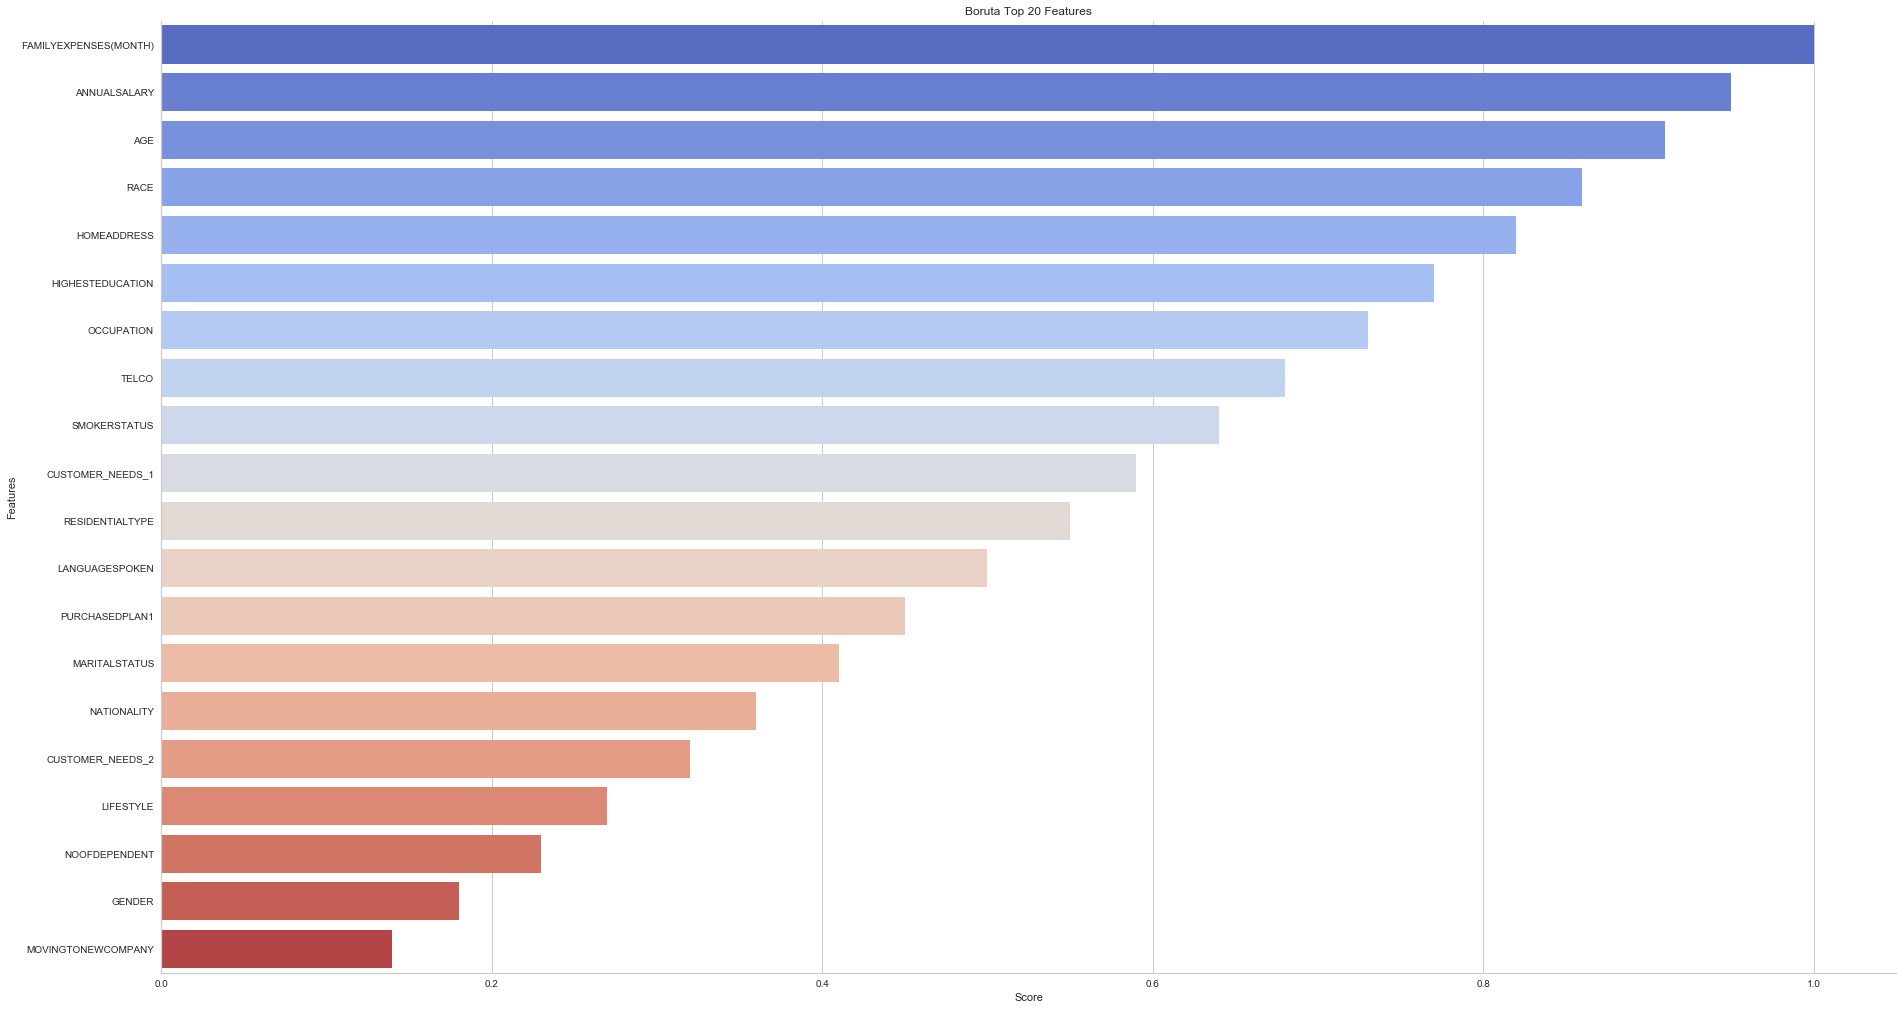

In [45]:
sns_boruta_plot = sns.catplot(x="Score", y="Features", data = boruta_score2[0:20], kind = "bar", 
               height=14, aspect=1.9, palette='coolwarm')
plt.title("Boruta Top 20 Features")

#### 2.2.2 RFE

In [46]:
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=10, n_estimators=100, random_state=10)
rf.fit(X2, y2)
rfe = RFECV(rf, min_features_to_select=1, cv=3)
rfe.fit(X2,y2)
rfe_score2 = ranking(list(map(float, rfe.ranking_)), colnames2, order=-1)
rfe_score2 = pd.DataFrame(list(rfe_score2.items()), columns=['Features','Score'])
rfe_score2 = rfe_score2.sort_values("Score",ascending = False)
print('---------Top 5----------')
display(rfe_score2.head(5))
print('---------Bottom 5----------')
rfe_score2.tail(5)

---------Top 5----------


Features  Score
0                AGE    1.0
1             GENDER    1.0
20    PURCHASEDPLAN1    1.0
19  CUSTOMER_NEEDS_2    1.0
18  CUSTOMER_NEEDS_1    1.0

---------Bottom 5----------


Features  Score
2         MARITALSTATUS   1.00
22  MEDICALCOMPLICATION   0.75
10   MOVINGTONEWCOMPANY   0.50
21            TRANSPORT   0.25
9            MALAYSIAPR   0.00

Text(0.5, 1, 'RFE Top 20 Features')

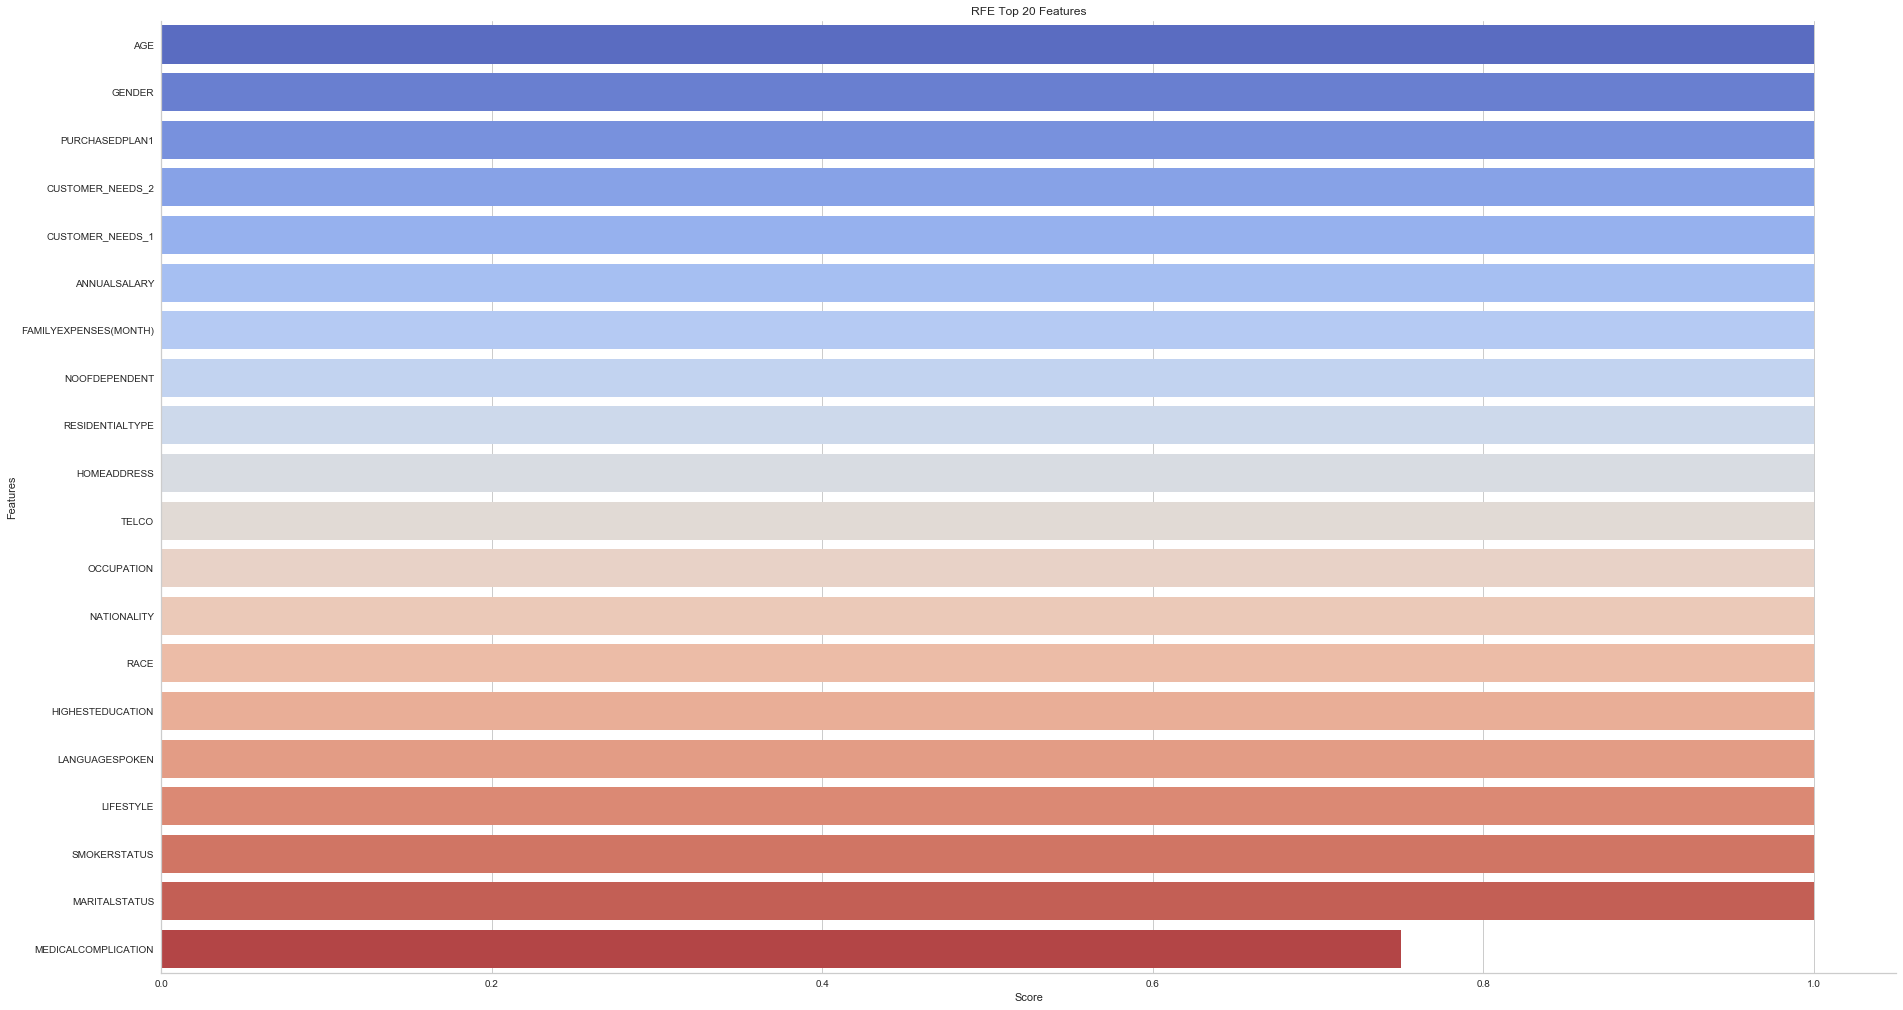

In [47]:
sns_rfe_plot = sns.catplot(x="Score", y="Features", data = rfe_score2[0:20], kind = "bar", 
               height=14, aspect=1.9, palette='coolwarm')
plt.title("RFE Top 20 Features")

#### 2.2 Optimal Features Selection

In [48]:
#Drop the least important features from boruta and rfe
X.drop(columns=['TRANSPORT', 'GENDER','MOVINGTONEWCOMPANY','HIGHESTEDUCATION'], inplace=True)
X2.drop(columns=['TRANSPORT', 'MOVINGTONEWCOMPANY','MEDICALCOMPLICATION','MALAYSIAPR',"GENDER"], inplace=True)

In [49]:
X.columns

Index(['AGE', 'MARITALSTATUS', 'SMOKERSTATUS', 'LIFESTYLE', 'LANGUAGESPOKEN',
       'RACE', 'NATIONALITY', 'MALAYSIAPR', 'OCCUPATION', 'TELCO',
       'HOMEADDRESS', 'RESIDENTIALTYPE', 'NOOFDEPENDENT',
       'FAMILYEXPENSES(MONTH)', 'ANNUALSALARY', 'CUSTOMER_NEEDS_1',
       'CUSTOMER_NEEDS_2', 'PURCHASEDPLAN2', 'MEDICALCOMPLICATION'],
      dtype='object')

In [50]:
X2.columns

Index(['AGE', 'MARITALSTATUS', 'SMOKERSTATUS', 'LIFESTYLE', 'LANGUAGESPOKEN',
       'HIGHESTEDUCATION', 'RACE', 'NATIONALITY', 'OCCUPATION', 'TELCO',
       'HOMEADDRESS', 'RESIDENTIALTYPE', 'NOOFDEPENDENT',
       'FAMILYEXPENSES(MONTH)', 'ANNUALSALARY', 'CUSTOMER_NEEDS_1',
       'CUSTOMER_NEEDS_2', 'PURCHASEDPLAN1'],
      dtype='object')

### THIS PART IS TO CHECK THE ACCURACY IF WE DO NOT SMOTE THE DATASET )
#### MIGHT BE IGNORE

In [51]:
#Boruta
rf = RandomForestClassifier(n_jobs=-1, class_weight="balanced", max_depth = 5)
feat_selector = BorutaPy(rf, n_estimators=100, random_state = 6)
feat_selector.fit(X3.values, y3.values.ravel())
colnames3 = X3.columns
boruta_score3 = ranking(list(map(float, feat_selector.ranking_)), colnames3, order=-1)
boruta_score3 = pd.DataFrame(list(boruta_score3.items()), columns=['Features', 'Score'])
boruta_score3 = boruta_score3.sort_values("Score", ascending = False)

print("Using the smote dataset for Feature Selection")
print('---------Top 5----------')
display(boruta_score3.head(5))
print('---------Bottom 5----------')
boruta_score3.tail(5)

Using the smote dataset for Feature Selection
---------Top 5----------


Features  Score
0                     AGE   1.00
16  FAMILYEXPENSES(MONTH)   0.95
17           ANNUALSALARY   0.91
13            HOMEADDRESS   0.86
3            SMOKERSTATUS   0.82

---------Bottom 5----------


Features  Score
18     CUSTOMER_NEEDS_1   0.18
1                GENDER   0.14
10   MOVINGTONEWCOMPANY   0.09
22  MEDICALCOMPLICATION   0.09
20            TRANSPORT   0.00

In [52]:
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=10, n_estimators=100, random_state=10)
rf.fit(X3, y3)
rfe = RFECV(rf, min_features_to_select=1, cv=3)
rfe.fit(X3,y3)
rfe_score3 = ranking(list(map(float, rfe.ranking_)), colnames3, order=-1)
rfe_score3 = pd.DataFrame(list(rfe_score3.items()), columns=['Features','Score'])
rfe_score3 = rfe_score3.sort_values("Score",ascending = False)

In [53]:
print('---------Top 5----------')
display(rfe_score3.head(5))
print('---------Bottom 5----------')
rfe_score3.tail(5)

---------Top 5----------


Features  Score
0                AGE    1.0
12             TELCO    1.0
21    PURCHASEDPLAN2    1.0
20         TRANSPORT    1.0
19  CUSTOMER_NEEDS_2    1.0

---------Bottom 5----------


Features  Score
4             LIFESTYLE    1.0
3          SMOKERSTATUS    1.0
2         MARITALSTATUS    1.0
22  MEDICALCOMPLICATION    1.0
9            MALAYSIAPR    0.0

In [54]:
X3.drop(columns=['TRANSPORT', 'MOVINGTONEWCOMPANY','MEDICALCOMPLICATION','MALAYSIAPR'], inplace=True)

In [55]:
X3.columns

Index(['AGE', 'GENDER', 'MARITALSTATUS', 'SMOKERSTATUS', 'LIFESTYLE',
       'LANGUAGESPOKEN', 'HIGHESTEDUCATION', 'RACE', 'NATIONALITY',
       'OCCUPATION', 'TELCO', 'HOMEADDRESS', 'RESIDENTIALTYPE',
       'NOOFDEPENDENT', 'FAMILYEXPENSES(MONTH)', 'ANNUALSALARY',
       'CUSTOMER_NEEDS_1', 'CUSTOMER_NEEDS_2', 'PURCHASEDPLAN2'],
      dtype='object')

##  3.0 Machine Learning Techniques

### 3.1 Classification for Purchaseplan1

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2, test_size = 0.3, random_state=7)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3,y3, test_size = 0.3, random_state=7)

#### 3.1.1 Random Forest Classifier (After SMOTE)

In [57]:
rf = RandomForestClassifier(random_state=16, max_depth = 13)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
prob_RF = rf.predict_proba(X_test)
prob_RF = prob_RF
auc_RF= roc_auc_score(y_test, prob_RF, average='weighted', multi_class='ovr')
print("Accuracy on training set : {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set     : {:.3f}".format(rf.score(X_test, y_test)))
print('AUC: %.2f' % auc_RF)
confusion_majority=confusion_matrix(y_test, y_pred)
print('Majority classifier Confusion Matrix\n', confusion_majority)
print("=====================================================")
#print('Precision= {:.2f}'.format(precision_score(y_test, y_pred,average='macro')))
#print('Recall= {:.2f}'. format(recall_score(y_test, y_pred,average='macro')))
#print('F1= {:.2f}'. format(f1_score(y_test, y_pred,average='macro')))
#print('Accuracy= {:.2f}'. format(accuracy_score(y_test, y_pred)))
target_names = ['Class 0', 'Class 1', 'Class 2']
print(classification_report(y_test, y_pred, target_names=target_names))
print("=====================================================")

Accuracy on training set : 1.000
Accuracy on test set     : 0.825
AUC: 0.92
Majority classifier Confusion Matrix
 [[62  2 11]
 [ 2 62  8]
 [ 9  6 55]]
              precision    recall  f1-score   support

     Class 0       0.85      0.83      0.84        75
     Class 1       0.89      0.86      0.87        72
     Class 2       0.74      0.79      0.76        70

    accuracy                           0.82       217
   macro avg       0.83      0.82      0.82       217
weighted avg       0.83      0.82      0.83       217



#### 3.1.2 Naive Bayes Classifier (After SMOTE)

In [58]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
prob_NB = nb.predict_proba(X_test)
prob_NB = prob_NB
auc_NB= roc_auc_score(y_test, prob_NB, average='weighted', multi_class='ovr')
print("Accuracy on training set : {:.3f}".format(nb.score(X_train, y_train)))
print("Accuracy on test set     : {:.3f}".format(nb.score(X_test, y_test)))
print('AUC: %.2f' % auc_NB)
confusion_majority=confusion_matrix(y_test, y_pred)
print('Majority classifier Confusion Matrix\n', confusion_majority)
print("=====================================================")
#print('Precision= {:.2f}'.format(precision_score(y_test, y_pred,average='macro')))
#print('Recall= {:.2f}'. format(recall_score(y_test, y_pred,average='macro')))
#print('F1= {:.2f}'. format(f1_score(y_test, y_pred,average='macro')))
#print('Accuracy= {:.2f}'. format(accuracy_score(y_test, y_pred)))
target_names = ['Class 0', 'Class 1', 'Class 2']
print(classification_report(y_test, y_pred, target_names=target_names))
print("=====================================================")

Accuracy on training set : 0.589
Accuracy on test set     : 0.548
AUC: 0.75
Majority classifier Confusion Matrix
 [[36 16 23]
 [15 41 16]
 [14 14 42]]
              precision    recall  f1-score   support

     Class 0       0.55      0.48      0.51        75
     Class 1       0.58      0.57      0.57        72
     Class 2       0.52      0.60      0.56        70

    accuracy                           0.55       217
   macro avg       0.55      0.55      0.55       217
weighted avg       0.55      0.55      0.55       217



#### 3.1.3 KNN Classifier (After Smote)

In [59]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
prob_KNN = knn.predict_proba(X_test)
auc_KNN = roc_auc_score(y_test, prob_KNN, multi_class="ovr")
print("Accuracy on training set : {:.3f}".format(knn.score(X_train, y_train)))
print("Accuracy on test set     : {:.3f}".format(knn.score(X_test, y_test)))
print('AUC: %.2f' % auc_KNN)
confusion_majority=confusion_matrix(y_test, y_pred)
print('Majority classifier Confusion Matrix\n', confusion_majority)
#print('Precision= {:.2f}'.format(precision_score(y_test, y_pred,average='macro')))
#print('Recall= {:.2f}'. format(recall_score(y_test, y_pred,average='macro')))
#print('F1= {:.2f}'. format(f1_score(y_test, y_pred,average='macro')))
#print('Accuracy= {:.2f}'. format(accuracy_score(y_test, y_pred)))
print("=====================================================")
#print('Precision= {:.2f}'.format(precision_score(y_test, y_pred,average='macro')))
#print('Recall= {:.2f}'. format(recall_score(y_test, y_pred,average='macro')))
#print('F1= {:.2f}'. format(f1_score(y_test, y_pred,average='macro')))
#print('Accuracy= {:.2f}'. format(accuracy_score(y_test, y_pred)))
target_names = ['Class 0', 'Class 1', 'Class 2']
print(classification_report(y_test, y_pred, target_names=target_names))
print("=====================================================")

Accuracy on training set : 0.704
Accuracy on test set     : 0.641
AUC: 0.83
Majority classifier Confusion Matrix
 [[62 12  1]
 [11 58  3]
 [19 32 19]]
              precision    recall  f1-score   support

     Class 0       0.67      0.83      0.74        75
     Class 1       0.57      0.81      0.67        72
     Class 2       0.83      0.27      0.41        70

    accuracy                           0.64       217
   macro avg       0.69      0.63      0.61       217
weighted avg       0.69      0.64      0.61       217



#### 3.1.4 SVM Classifier (After Smote)

In [60]:
model = SVC(kernel = 'rbf', gamma = 'auto', probability=True)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
prob_SVM = model.predict_proba(X_test)
auc_SVM = roc_auc_score(y_test, prob_SVM, multi_class="ovr")
print("Accuracy on training set : {:.3f}".format(model.score(X_train, y_train)))
print("Accuracy on test set     : {:.3f}".format(model.score(X_test, y_test)))
print('AUC: %.2f' % auc_SVM)
confusion_majority=confusion_matrix(y_test, y_pred)
print('Majority classifier Confusion Matrix\n', confusion_majority)
#print('Precision= {:.2f}'.format(precision_score(y_test, y_pred,average='macro')))
#print('Recall= {:.2f}'. format(recall_score(y_test, y_pred,average='macro')))
#print('F1= {:.2f}'. format(f1_score(y_test, y_pred,average='macro')))
#print('Accuracy= {:.2f}'. format(accuracy_score(y_test, y_pred)))

print("=====================================================")
#print('Precision= {:.2f}'.format(precision_score(y_test, y_pred,average='macro')))
#print('Recall= {:.2f}'. format(recall_score(y_test, y_pred,average='macro')))
#print('F1= {:.2f}'. format(f1_score(y_test, y_pred,average='macro')))
#print('Accuracy= {:.2f}'. format(accuracy_score(y_test, y_pred)))
target_names = ['Class 0', 'Class 1', 'Class 2']
print(classification_report(y_test, y_pred, target_names=target_names))
print("=====================================================")

Accuracy on training set : 0.931
Accuracy on test set     : 0.756
AUC: 0.91
Majority classifier Confusion Matrix
 [[58  3 14]
 [ 2 62  8]
 [10 16 44]]
              precision    recall  f1-score   support

     Class 0       0.83      0.77      0.80        75
     Class 1       0.77      0.86      0.81        72
     Class 2       0.67      0.63      0.65        70

    accuracy                           0.76       217
   macro avg       0.75      0.75      0.75       217
weighted avg       0.76      0.76      0.75       217



### 3.2 Classification for purchasedplan2

#### 3.2.1 Random Forest Classifier  (After Smote)

In [61]:
rf.fit(X_train2, y_train2)
y_pred2 = rf.predict(X_test2)
prob_RF2 = rf.predict_proba(X_test2)
auc_RF2 = roc_auc_score(y_test2, prob_RF2, average='weighted', multi_class='ovr')
print("Accuracy on training set : {:.3f}".format(rf.score(X_train2, y_train2)))
print("Accuracy on test set     : {:.3f}".format(rf.score(X_test2, y_test2)))
print('AUC: %.2f' % auc_RF2)
confusion_majority=confusion_matrix(y_test2, y_pred2)
print('Majority classifier Confusion Matrix\n', confusion_majority)
print("=====================================================")
#print('Precision= {:.2f}'.format(precision_score(y_test, y_pred,average='macro')))
#print('Recall= {:.2f}'. format(recall_score(y_test, y_pred,average='macro')))
#print('F1= {:.2f}'. format(f1_score(y_test, y_pred,average='macro')))
#print('Accuracy= {:.2f}'. format(accuracy_score(y_test, y_pred)))
target_names = ['Class 0', 'Class 1', 'Class 2']
print(classification_report(y_test2, y_pred2, target_names=target_names))
print("=====================================================")

Accuracy on training set : 1.000
Accuracy on test set     : 0.404
AUC: 0.64
Majority classifier Confusion Matrix
 [[33 13  5]
 [15 16 13]
 [19 25 12]]
              precision    recall  f1-score   support

     Class 0       0.49      0.65      0.56        51
     Class 1       0.30      0.36      0.33        44
     Class 2       0.40      0.21      0.28        56

    accuracy                           0.40       151
   macro avg       0.40      0.41      0.39       151
weighted avg       0.40      0.40      0.39       151



#### 3.2.2 Naive Bayes Classifier  (After Smote)

In [62]:
nb = GaussianNB()
nb.fit(X_train2, y_train2)
y_pred2 = nb.predict(X_test2)
prob_NB2 = nb.predict_proba(X_test2)
auc_NB2 = roc_auc_score(y_test2, prob_NB2, average='weighted', multi_class='ovr')
print("Accuracy on training set : {:.3f}".format(nb.score(X_train2, y_train2)))
print("Accuracy on test set     : {:.3f}".format(nb.score(X_test2, y_test2)))
print('AUC: %.2f' % auc_NB2)
confusion_majority = confusion_matrix(y_test2, y_pred2)
print('Majority classifier Confusion Matrix\n', confusion_majority)
print("=====================================================")
#print('Precision= {:.2f}'.format(precision_score(y_test, y_pred,average='macro')))
#print('Recall= {:.2f}'. format(recall_score(y_test, y_pred,average='macro')))
#print('F1= {:.2f}'. format(f1_score(y_test, y_pred,average='macro')))
#print('Accuracy= {:.2f}'. format(accuracy_score(y_test, y_pred)))
target_names = ['Class 0', 'Class 1', 'Class 2']
print(classification_report(y_test2, y_pred2, target_names=target_names))
print("=====================================================")

Accuracy on training set : 0.517
Accuracy on test set     : 0.430
AUC: 0.59
Majority classifier Confusion Matrix
 [[31 13  7]
 [16 15 13]
 [16 21 19]]
              precision    recall  f1-score   support

     Class 0       0.49      0.61      0.54        51
     Class 1       0.31      0.34      0.32        44
     Class 2       0.49      0.34      0.40        56

    accuracy                           0.43       151
   macro avg       0.43      0.43      0.42       151
weighted avg       0.44      0.43      0.43       151



#### 3.2.3 KNN Classification  (After Smote)

In [63]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train2, y_train2)
y_pred2 = knn.predict(X_test2)
prob_KNN2 = knn.predict_proba(X_test2)
auc_KNN2 = roc_auc_score(y_test2, prob_KNN2, multi_class="ovr")
print("Accuracy on training set : {:.3f}".format(knn.score(X_train2, y_train2)))
print("Accuracy on test set     : {:.3f}".format(knn.score(X_test2, y_test2)))
print('AUC: %.2f' % auc_KNN2)
confusion_majority=confusion_matrix(y_test2, y_pred2)
print('Majority classifier Confusion Matrix\n', confusion_majority)
#print('Precision= {:.2f}'.format(precision_score(y_test, y_pred,average='macro')))
#print('Recall= {:.2f}'. format(recall_score(y_test, y_pred,average='macro')))
#print('F1= {:.2f}'. format(f1_score(y_test, y_pred,average='macro')))
#print('Accuracy= {:.2f}'. format(accuracy_score(y_test, y_pred)))
print("=====================================================")
#print('Precision= {:.2f}'.format(precision_score(y_test, y_pred,average='macro')))
#print('Recall= {:.2f}'. format(recall_score(y_test, y_pred,average='macro')))
#print('F1= {:.2f}'. format(f1_score(y_test, y_pred,average='macro')))
#print('Accuracy= {:.2f}'. format(accuracy_score(y_test, y_pred)))
target_names = ['Class 0', 'Class 1', 'Class 2']
print(classification_report(y_test2, y_pred2, target_names=target_names))
print("=====================================================")

Accuracy on training set : 0.554
Accuracy on test set     : 0.477
AUC: 0.65
Majority classifier Confusion Matrix
 [[36  9  6]
 [14 26  4]
 [25 21 10]]
              precision    recall  f1-score   support

     Class 0       0.48      0.71      0.57        51
     Class 1       0.46      0.59      0.52        44
     Class 2       0.50      0.18      0.26        56

    accuracy                           0.48       151
   macro avg       0.48      0.49      0.45       151
weighted avg       0.48      0.48      0.44       151



#### 3.2.4 SVM Classification  (After Smote)

In [64]:
model = SVC(kernel = 'rbf', gamma = 'auto', probability=True)
model.fit(X_train2,y_train2)
y_pred2 = model.predict(X_test2)
prob_SVM2 = model.predict_proba(X_test2)
auc_SVM2 = roc_auc_score(y_test2, prob_SVM2, multi_class="ovr")
print("Accuracy on training set : {:.3f}".format(model.score(X_train2, y_train2)))
print("Accuracy on test set     : {:.3f}".format(model.score(X_test2, y_test2)))
print('AUC: %.2f' % auc_SVM2)
confusion_majority2=confusion_matrix(y_test2, y_pred2)
print('Majority classifier Confusion Matrix\n', confusion_majority2)
#print('Precision= {:.2f}'.format(precision_score(y_test, y_pred,average='macro')))
#print('Recall= {:.2f}'. format(recall_score(y_test, y_pred,average='macro')))
#print('F1= {:.2f}'. format(f1_score(y_test, y_pred,average='macro')))
#print('Accuracy= {:.2f}'. format(accuracy_score(y_test, y_pred)))
print("=====================================================")
#print('Precision= {:.2f}'.format(precision_score(y_test, y_pred,average='macro')))
#print('Recall= {:.2f}'. format(recall_score(y_test, y_pred,average='macro')))
#print('F1= {:.2f}'. format(f1_score(y_test, y_pred,average='macro')))
#print('Accuracy= {:.2f}'. format(accuracy_score(y_test, y_pred)))
target_names = ['Class 0', 'Class 1', 'Class 2']
print(classification_report(y_test2, y_pred2, target_names=target_names))
print("=====================================================")

Accuracy on training set : 0.869
Accuracy on test set     : 0.430
AUC: 0.59
Majority classifier Confusion Matrix
 [[30 12  9]
 [14 22  8]
 [14 29 13]]
              precision    recall  f1-score   support

     Class 0       0.52      0.59      0.55        51
     Class 1       0.35      0.50      0.41        44
     Class 2       0.43      0.23      0.30        56

    accuracy                           0.43       151
   macro avg       0.43      0.44      0.42       151
weighted avg       0.44      0.43      0.42       151



### THIS PART IS TO CHECK THE ACCURACY IF WE DONOT SMOTE THE DATASET 
#### MIGHT BE IGNORE

In [65]:
rf.fit(X_train3, y_train3)
y_pred3 = rf.predict(X_test3)
prob_RF3 = rf.predict_proba(X_test3)
auc_RF3 = roc_auc_score(y_test3, prob_RF3, average='weighted', multi_class='ovr')
print("Accuracy on training set : {:.3f}".format(rf.score(X_train3, y_train3)))
print("Accuracy on test set     : {:.3f}".format(rf.score(X_test3, y_test3)))
print('AUC: %.3f' % auc_RF3)
confusion_majority=confusion_matrix(y_test3, y_pred3)
print('Majority classifier Confusion Matrix\n', confusion_majority)
print("=====================================================")
#print('Precision= {:.3f}'.format(precision_score(y_test, y_pred,average='macro')))
#print('Recall= {:.3f}'. format(recall_score(y_test, y_pred,average='macro')))
#print('F1= {:.3f}'. format(f1_score(y_test, y_pred,average='macro')))
#print('Accuracy= {:.3f}'. format(accuracy_score(y_test, y_pred)))
target_names = ['Class 0', 'Class 1', 'Class 3']
print(classification_report(y_test3, y_pred3, target_names=target_names))
print("=====================================================")

Accuracy on training set : 1.000
Accuracy on test set     : 0.560
AUC: 0.582
Majority classifier Confusion Matrix
 [[ 1  1 36]
 [ 1  1 25]
 [ 1  2 82]]
              precision    recall  f1-score   support

     Class 0       0.33      0.03      0.05        38
     Class 1       0.25      0.04      0.06        27
     Class 3       0.57      0.96      0.72        85

    accuracy                           0.56       150
   macro avg       0.39      0.34      0.28       150
weighted avg       0.45      0.56      0.43       150



In [66]:
nb = GaussianNB()
nb.fit(X_train3, y_train3)
y_pred3 = nb.predict(X_test3)
prob_NB3 = nb.predict_proba(X_test3)
auc_NB3 = roc_auc_score(y_test3, prob_NB3, average='weighted', multi_class='ovr')
print("Accuracy on training set : {:.3f}".format(nb.score(X_train3, y_train3)))
print("Accuracy on test set     : {:.3f}".format(nb.score(X_test3, y_test3)))
print('AUC: %.3f' % auc_NB3)
confusion_majority = confusion_matrix(y_test3, y_pred3)
print('Majority classifier Confusion Matrix\n', confusion_majority)
print("=====================================================")
#print('Precision= {:.3f}'.format(precision_score(y_test, y_pred,average='macro')))
#print('Recall= {:.3f}'. format(recall_score(y_test, y_pred,average='macro')))
#print('F1= {:.3f}'. format(f1_score(y_test, y_pred,average='macro')))
#print('Accuracy= {:.3f}'. format(accuracy_score(y_test, y_pred)))
target_names = ['Class 0', 'Class 1', 'Class 3']
print(classification_report(y_test3, y_pred3, target_names=target_names))
print("=====================================================")

Accuracy on training set : 0.594
Accuracy on test set     : 0.567
AUC: 0.615
Majority classifier Confusion Matrix
 [[ 0  0 38]
 [ 0  0 27]
 [ 0  0 85]]
              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00        38
     Class 1       0.00      0.00      0.00        27
     Class 3       0.57      1.00      0.72        85

    accuracy                           0.57       150
   macro avg       0.19      0.33      0.24       150
weighted avg       0.32      0.57      0.41       150



C:\Users\jiekl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [67]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train3, y_train3)
y_pred3 = knn.predict(X_test3)
prob_KNN3 = knn.predict_proba(X_test3)
auc_KNN3 = roc_auc_score(y_test3, prob_KNN3, multi_class="ovr")
print("Accuracy on training set : {:.3f}".format(knn.score(X_train3, y_train3)))
print("Accuracy on test set     : {:.3f}".format(knn.score(X_test3, y_test3)))
print('AUC: %.3f' % auc_KNN3)
confusion_majority=confusion_matrix(y_test3, y_pred3)
print('Majority classifier Confusion Matrix\n', confusion_majority)
#print('Precision= {:.3f}'.format(precision_score(y_test, y_pred,average='macro')))
#print('Recall= {:.3f}'. format(recall_score(y_test, y_pred,average='macro')))
#print('F1= {:.3f}'. format(f1_score(y_test, y_pred,average='macro')))
#print('Accuracy= {:.3f}'. format(accuracy_score(y_test, y_pred)))
print("=====================================================")
#print('Precision= {:.3f}'.format(precision_score(y_test, y_pred,average='macro')))
#print('Recall= {:.3f}'. format(recall_score(y_test, y_pred,average='macro')))
#print('F1= {:.3f}'. format(f1_score(y_test, y_pred,average='macro')))
#print('Accuracy= {:.3f}'. format(accuracy_score(y_test, y_pred)))
target_names = ['Class 0', 'Class 1', 'Class 3']
print(classification_report(y_test3, y_pred3, target_names=target_names))
print("=====================================================")

Accuracy on training set : 0.589
Accuracy on test set     : 0.500
AUC: 0.537
Majority classifier Confusion Matrix
 [[ 4  3 31]
 [ 1  2 24]
 [ 8  8 69]]
              precision    recall  f1-score   support

     Class 0       0.31      0.11      0.16        38
     Class 1       0.15      0.07      0.10        27
     Class 3       0.56      0.81      0.66        85

    accuracy                           0.50       150
   macro avg       0.34      0.33      0.31       150
weighted avg       0.42      0.50      0.43       150



In [68]:
model = SVC(kernel = 'rbf', gamma = 'auto', probability=True)
model.fit(X_train3,y_train3)
y_pred3 = model.predict(X_test3)
prob_SVM3 = model.predict_proba(X_test3)
auc_SVM3 = roc_auc_score(y_test3, prob_SVM3, multi_class="ovr")
print("Accuracy on training set : {:.3f}".format(model.score(X_train3, y_train3)))
print("Accuracy on test set     : {:.3f}".format(model.score(X_test3, y_test3)))
print('AUC: %.3f' % auc_SVM3)
confusion_majority3=confusion_matrix(y_test3, y_pred3)
print('Majority classifier Confusion Matrix\n', confusion_majority3)
#print('Precision= {:.3f}'.format(precision_score(y_test, y_pred,average='macro')))
#print('Recall= {:.3f}'. format(recall_score(y_test, y_pred,average='macro')))
#print('F1= {:.3f}'. format(f1_score(y_test, y_pred,average='macro')))
#print('Accuracy= {:.3f}'. format(accuracy_score(y_test, y_pred)))
print("=====================================================")
#print('Precision= {:.3f}'.format(precision_score(y_test, y_pred,average='macro')))
#print('Recall= {:.3f}'. format(recall_score(y_test, y_pred,average='macro')))
#print('F1= {:.3f}'. format(f1_score(y_test, y_pred,average='macro')))
#print('Accuracy= {:.3f}'. format(accuracy_score(y_test, y_pred)))
target_names = ['Class 0', 'Class 1', 'Class 3']
print(classification_report(y_test3, y_pred3, target_names=target_names))
print("=====================================================")

Accuracy on training set : 0.997
Accuracy on test set     : 0.567
AUC: 0.509
Majority classifier Confusion Matrix
 [[ 0  0 38]
 [ 0  0 27]
 [ 0  0 85]]
              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00        38
     Class 1       0.00      0.00      0.00        27
     Class 3       0.57      1.00      0.72        85

    accuracy                           0.57       150
   macro avg       0.19      0.33      0.24       150
weighted avg       0.32      0.57      0.41       150



C:\Users\jiekl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 3.3 Clustering

In [69]:
df3 = df.dropna()

In [70]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 31 to 491
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   AGE                    47 non-null     float64 
 1   GENDER                 47 non-null     object  
 2   MARITALSTATUS          47 non-null     object  
 3   SMOKERSTATUS           47 non-null     object  
 4   LIFESTYLE              47 non-null     object  
 5   LANGUAGESPOKEN         47 non-null     object  
 6   HIGHESTEDUCATION       47 non-null     object  
 7   RACE                   47 non-null     object  
 8   NATIONALITY            47 non-null     object  
 9   MALAYSIAPR             47 non-null     object  
 10  MOVINGTONEWCOMPANY     47 non-null     object  
 11  OCCUPATION             47 non-null     object  
 12  TELCO                  47 non-null     object  
 13  HOMEADDRESS            47 non-null     object  
 14  RESIDENTIALTYPE        47 non-null     obj

#### 3.3.1 Clustering Purchaseplan1 Purchaseplan2

In [71]:
y = df3['PURCHASEDPLAN1']
y2 = df3['PURCHASEDPLAN2']
X = df3.drop(['PURCHASEDPLAN1', 'PURCHASEDPLAN2', 'AGE_GROUP',"CUSTOMER_PURCHASED1","CUSTOMER_PURCHASED2"], axis=1)
X = pd.get_dummies(X, drop_first=True)

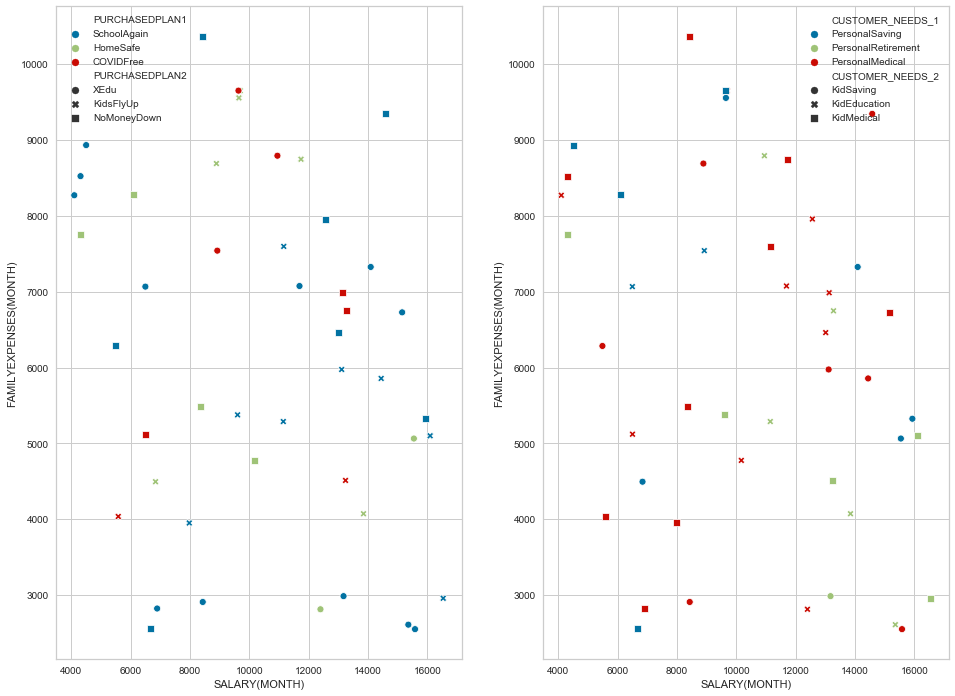

In [72]:
fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(16,12))
sns.scatterplot(x="SALARY(MONTH)", y="FAMILYEXPENSES(MONTH)", hue="PURCHASEDPLAN1", style="PURCHASEDPLAN2", data=df3,ax=ax1)
sns.scatterplot(x="SALARY(MONTH)", y="FAMILYEXPENSES(MONTH)", hue="CUSTOMER_NEEDS_1", style="CUSTOMER_NEEDS_2", data=df3, ax=ax2)

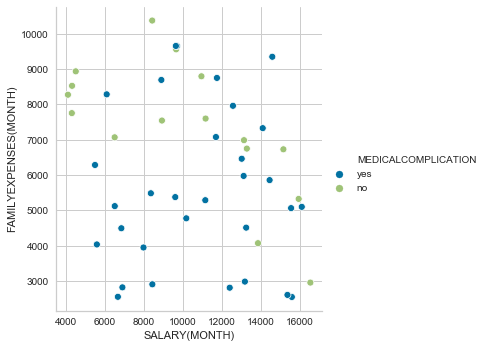

In [73]:
ax = sns.relplot(x="SALARY(MONTH)", y="FAMILYEXPENSES(MONTH)", hue="MEDICALCOMPLICATION", data=df3)

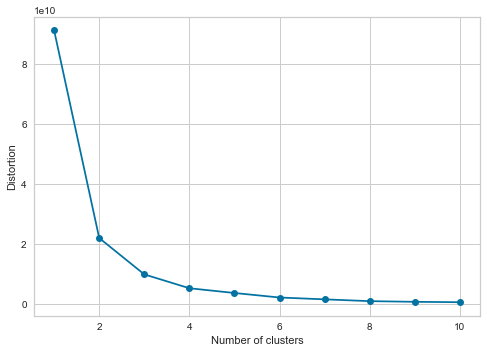

In [74]:
#To check which K is the best 
distortions = []
for i in range(1,11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()


In [75]:
km = KMeans(n_clusters=3, random_state=2)
km.fit(X)
df3_new = df3.copy()
df3_new = df3_new.drop(["PURCHASEDPLAN1","CUSTOMER_PURCHASED1","CUSTOMER_PURCHASED2"],axis=1)
df3_new['PURCHASEDPLAN1']=km.labels_
df3_new.head()

AGE  GENDER MARITALSTATUS SMOKERSTATUS LIFESTYLE LANGUAGESPOKEN  \
31  37.0  female       married    sometimes  pub_goer          malay   
34  25.0    male       married     frequent      home        english   
35  44.0    male        single    sometimes      home        english   
80  37.0    male        single    sometimes   outdoor        english   
82  37.0    male        single     frequent   outdoor          malay   

   HIGHESTEDUCATION     RACE NATIONALITY MALAYSIAPR  ...  \
31           Master    malay   Malaysian         no  ...   
34         Bachelor    malay      others        yes  ...   
35         Bachelor  chinese   Malaysian        yes  ...   
80         Bachelor   indian      others        yes  ...   
82          Diploma    malay   Malaysian        yes  ...   

   FAMILYEXPENSES(MONTH) ANNUALSALARY    CUSTOMER_NEEDS_1 CUSTOMER_NEEDS_2  \
31                7325.0     169046.0      PersonalSaving        KidSaving   
34                5288.0     133717.0  PersonalRetirement     KidEducation   
35                2552.0     186967.0     PersonalMedical        KidSaving   
80                5325.0     191164.0      PersonalSaving        KidSaving   
82                9553.0     115770.0      PersonalSaving        KidSaving   

   TRANSPORT  PURCHASEDPLAN2  MEDICALCOMPLICATION  AGE_GROUP SALARY(MONTH)  \
31   driving            XEdu                  yes   (30, 40]  14087.166667   
34   driving       KidsFlyUp                  yes   (20, 30]  11143.083333   
35   driving            XEdu                  yes   (40, 50]  15580.583333   
80   driving     NoMoneyDown                   no   (30, 40]  15930.333333   
82   driving       KidsFlyUp                   no   (30, 40]   9647.500000   

   PURCHASEDPLAN1  
31              1  
34              2  
35              1  
80              1  
82              2  

[5 rows x 26 columns]

In [76]:
km.labels_

array([1, 2, 1, 1, 2, 1, 1, 0, 2, 1, 0, 2, 0, 1, 1, 2, 0, 2, 0, 0, 2, 1,
       2, 0, 1, 1, 1, 0, 2, 2, 1, 1, 1, 2, 0, 1, 2, 1, 2, 1, 1, 0, 2, 2,
       0, 0, 2])

In [77]:
fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(16,12))
sns.scatterplot(x="SALARY(MONTH)", y="FAMILYEXPENSES(MONTH)", hue="PURCHASEDPLAN1", data=df3,ax=ax1)
sns.scatterplot(x="SALARY(MONTH)", y="FAMILYEXPENSES(MONTH)", hue="PURCHASEDPLAN1", data=df3_new, ax=ax2)

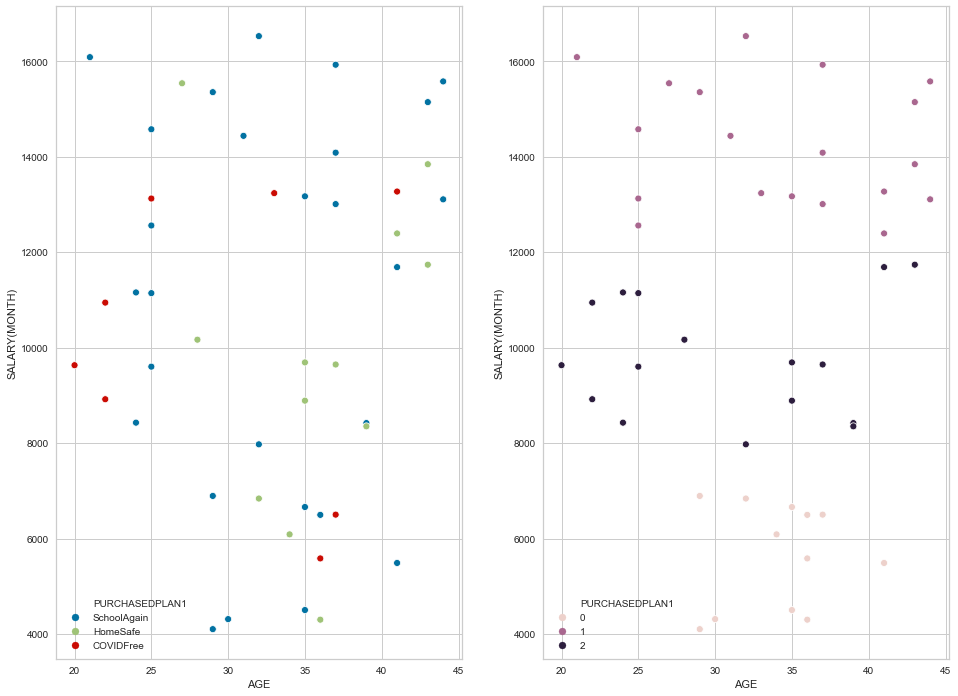

In [78]:
fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(16,12))
sns.scatterplot(x="AGE", y="SALARY(MONTH)", hue="PURCHASEDPLAN1", data=df3,ax=ax1)
sns.scatterplot(x="AGE", y="SALARY(MONTH)", hue="PURCHASEDPLAN1", data=df3_new,ax=ax2)

In [79]:
print(silhouette_score(X, km.labels_))
silhouette_visualizer(km,X,colors='yellowbrick')

0.5965359432896206


C:\Users\jiekl\anaconda3\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000001F1CB96ED48>,
                     colors='yellowbrick', model=None)

In [80]:
#km.fit(X)
#df3_new_2 = df3.copy()
#df3_new_2 = df3_new_2.drop(["PURCHASEDPLAN2","CUSTOMER_PURCHASED1","CUSTOMER_PURCHASED2"],axis=1)
#df3_new_2['PURCHASEDPLAN2']=km.labels_
#df3_new_2.head()

In [81]:
#km.labels_

In [82]:
#fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(16,12))
#sns.scatterplot(x="SALARY(MONTH)", y="FAMILYEXPENSES(MONTH)", hue="PURCHASEDPLAN2", data=df3,ax=ax1)
#sns.scatterplot(x="SALARY(MONTH)", y="FAMILYEXPENSES(MONTH)", hue="PURCHASEDPLAN2", data=df3_new_2, ax=ax2)

In [83]:
#fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(16,12))
#sns.scatterplot(x="AGE", y="SALARY(MONTH)", hue="PURCHASEDPLAN2", data=df3,ax=ax1)
#sns.scatterplot(x="AGE", y="SALARY(MONTH)", hue="PURCHASEDPLAN2", data=df3_new_2,ax=ax2)

In [84]:
#print(silhouette_score(X, km.labels_))
#silhouette_visualizer(km,X,colors='yellowbrick')

### 3.4 Association Rules Mining 

#### 3.4.1 Customer_Needs_1 and PurchasePlan1

In [85]:
df_arm1 = df2[["CUSTOMER_NEEDS_1","PURCHASEDPLAN1"]]
dfv = df_arm1.values
te = TransactionEncoder()
te_ary = te.fit(dfv).transform(dfv)
df_arm = pd.DataFrame(te_ary, columns=te.columns_)
df_arm
frequent_itemsets = apriori(df_arm, min_support=0.05, use_colnames=True)
#print (frequent_itemsets)
association_rules(frequent_itemsets, metric="confidence", min_threshold=0.2)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.2)
rules = rules.sort_values(['support', 'confidence'], ascending =[False, False])
rules.head()

antecedents           consequents  antecedent support  \
13     (PersonalMedical)         (SchoolAgain)               0.396   
12         (SchoolAgain)     (PersonalMedical)               0.588   
15  (PersonalRetirement)         (SchoolAgain)               0.318   
14         (SchoolAgain)  (PersonalRetirement)               0.588   
17      (PersonalSaving)         (SchoolAgain)               0.286   

    consequent support  support  confidence      lift  leverage  conviction  
13               0.588    0.234    0.590909  1.004947  0.001152    1.007111  
12               0.396    0.234    0.397959  1.004947  0.001152    1.003254  
15               0.588    0.190    0.597484  1.016130  0.003016    1.023562  
14               0.318    0.190    0.323129  1.016130  0.003016    1.007578  
17               0.588    0.164    0.573427  0.975215 -0.004168    0.965836

In [86]:
#To have a better views of the rules 
cnt = 0
itemsets = []
for index, rule in rules.iterrows():
    cnt += 1
    print("(Rule " + str(cnt) + ") " + list(rule['antecedents'])[0] + " -> " + list(rule['consequents'])[0])
    itemsets.append(list(rule['antecedents'])[0] + " -> " + list(rule['consequents'])[0])
    print("Support: " + str(round(rule['support'], 3)))
    print("Confidence: " + str(round(rule['confidence'], 3)))
    print("Lift: " + str(round(rule['lift'],3)))
    print("=====================================")

(Rule 1) PersonalMedical -> SchoolAgain
Support: 0.234
Confidence: 0.591
Lift: 1.005
(Rule 2) SchoolAgain -> PersonalMedical
Support: 0.234
Confidence: 0.398
Lift: 1.005
(Rule 3) PersonalRetirement -> SchoolAgain
Support: 0.19
Confidence: 0.597
Lift: 1.016
(Rule 4) SchoolAgain -> PersonalRetirement
Support: 0.19
Confidence: 0.323
Lift: 1.016
(Rule 5) PersonalSaving -> SchoolAgain
Support: 0.164
Confidence: 0.573
Lift: 0.975
(Rule 6) SchoolAgain -> PersonalSaving
Support: 0.164
Confidence: 0.279
Lift: 0.975
(Rule 7) COVIDFree -> PersonalMedical
Support: 0.092
Confidence: 0.418
Lift: 1.056
(Rule 8) PersonalMedical -> COVIDFree
Support: 0.092
Confidence: 0.232
Lift: 1.056
(Rule 9) HomeSafe -> PersonalMedical
Support: 0.07
Confidence: 0.365
Lift: 0.921
(Rule 10) HomeSafe -> PersonalRetirement
Support: 0.07
Confidence: 0.365
Lift: 1.146
(Rule 11) COVIDFree -> PersonalSaving
Support: 0.07
Confidence: 0.318
Lift: 1.113
(Rule 12) PersonalSaving -> COVIDFree
Support: 0.07
Confidence: 0.245
Lift

#### 3.4.2 Customer_Needs_2 and PurchasePlan2

In [87]:
df_arm2 = df2[["CUSTOMER_NEEDS_2","PURCHASEDPLAN2"]]
dfv2 = df_arm2.values
te_ary2 = te.fit(dfv2).transform(dfv2)
df_arm2 = pd.DataFrame(te_ary2, columns=te.columns_)
df_arm2
frequent_itemsets2 = apriori(df_arm2, min_support=0.05, use_colnames=True)
#print (frequent_itemsets2)
association_rules(frequent_itemsets2, metric="confidence", min_threshold=0.2)
rules2 = association_rules(frequent_itemsets2, metric="lift", min_threshold=0.2)
rules2 = rules2.sort_values(['support', 'confidence'], ascending =[False, False]) 
rules2.head()

antecedents     consequents  antecedent support  consequent support  \
5           (XEdu)  (KidEducation)               0.378               0.434   
4   (KidEducation)          (XEdu)               0.434               0.378   
3    (NoMoneyDown)  (KidEducation)               0.308               0.434   
2   (KidEducation)   (NoMoneyDown)               0.434               0.308   
11          (XEdu)    (KidMedical)               0.378               0.388   

    support  confidence      lift  leverage  conviction  
5     0.162    0.428571  0.987492 -0.002052    0.990500  
4     0.162    0.373272  0.987492 -0.002052    0.992456  
3     0.146    0.474026  1.092226  0.012328    1.076099  
2     0.146    0.336406  1.092226  0.012328    1.042806  
11    0.142    0.375661  0.968199 -0.004664    0.980237

In [88]:
cnt =0
itemsets2 = []
for index, rule in rules2.iterrows():
    cnt += 1
    print("(Rule " + str(cnt) + ") " + list(rule['antecedents'])[0] + " -> " + list(rule['consequents'])[0])
    itemsets2.append(list(rule['antecedents'])[0] + " -> " + list(rule['consequents'])[0])
    print("Support: " + str(round(rule['support'], 3)))
    print("Confidence: " + str(round(rule['confidence'], 3)))
    print("Lift: " + str(round(rule['lift'],3)))
    print("=====================================")

(Rule 1) XEdu -> KidEducation
Support: 0.162
Confidence: 0.429
Lift: 0.987
(Rule 2) KidEducation -> XEdu
Support: 0.162
Confidence: 0.373
Lift: 0.987
(Rule 3) NoMoneyDown -> KidEducation
Support: 0.146
Confidence: 0.474
Lift: 1.092
(Rule 4) KidEducation -> NoMoneyDown
Support: 0.146
Confidence: 0.336
Lift: 1.092
(Rule 5) XEdu -> KidMedical
Support: 0.142
Confidence: 0.376
Lift: 0.968
(Rule 6) KidMedical -> XEdu
Support: 0.142
Confidence: 0.366
Lift: 0.968
(Rule 7) KidsFlyUp -> KidMedical
Support: 0.132
Confidence: 0.42
Lift: 1.083
(Rule 8) KidMedical -> KidsFlyUp
Support: 0.132
Confidence: 0.34
Lift: 1.083
(Rule 9) KidsFlyUp -> KidEducation
Support: 0.126
Confidence: 0.401
Lift: 0.925
(Rule 10) KidEducation -> KidsFlyUp
Support: 0.126
Confidence: 0.29
Lift: 0.925
(Rule 11) NoMoneyDown -> KidMedical
Support: 0.114
Confidence: 0.37
Lift: 0.954
(Rule 12) KidMedical -> NoMoneyDown
Support: 0.114
Confidence: 0.294
Lift: 0.954
(Rule 13) KidSaving -> XEdu
Support: 0.074
Confidence: 0.416
Lift

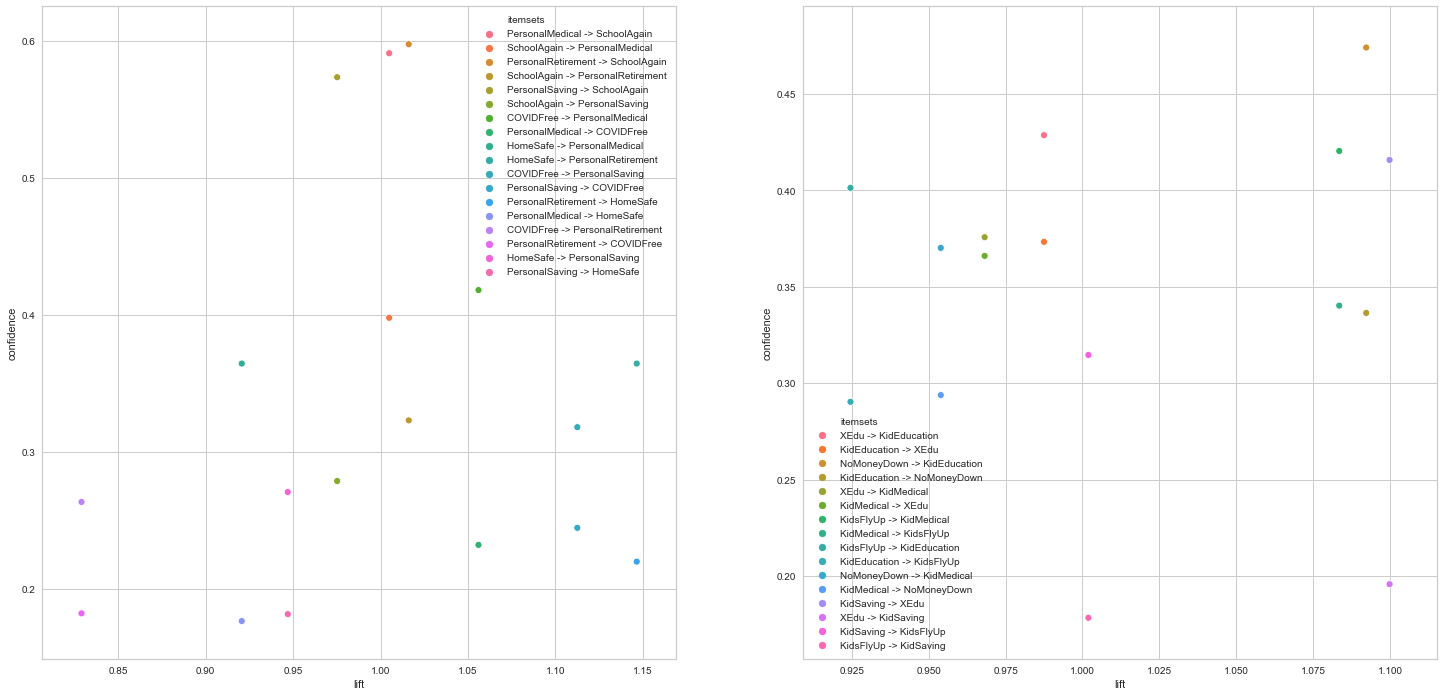

In [89]:
rules['itemsets'] = itemsets
rules2['itemsets'] = itemsets2
#fig, axs = plt.subplots(2, 1, figsize=(13,10))
#axs[0].plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], fit_fn1(rules['lift']))
#axs[0].set_title('Customer_Needs_1 and PurchasePlan1')
#axs[1].plot(rules2['lift'], rules2['confidence'], 'yo', rules2['lift'],fit_fn2(rules2['lift']))
#axs[1].set_title('Customer_Needs_2 and PurchasePlan2')
#axs[1, 0].plot(rules3['lift'], rules3['confidence'], 'yo', rules3['lift'], fit_fn3(rules3['lift']))
#axs[1, 0].set_title('PurchasePlan1 and PurchasePlan2')
#axs[1, 1].plot(rules4['lift'], rules4['confidence'], 'yo', rules4['lift'], fit_fn4(rules4['lift']))
#axs[1, 1].set_title('Customer_Needs_1 and Customer_Needs_2')
fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(25,12))
sns.scatterplot(x="lift", y="confidence", hue="itemsets", data=rules,ax=ax1)
sns.scatterplot(x="lift", y="confidence", hue="itemsets", data=rules2,ax=ax2)

### 4.0 Results and Discussion / Findings

#### ALL THE RESULTS HAS BEEN PLACED IN THE REPORT 

### 5.0 Reference
http://rasbt.github.io/mlxtend/user_guide/preprocessing/TransactionEncoder/

https://stackabuse.com/association-rule-mining-via-apriori-algorithm-in-python/

https://medium.com/analytics-vidhya/association-analysis-in-python-2b955d0180c

https://intelligentonlinetools.com/blog/2018/02/10/how-to-create-data-visualization-for-association-rules-in-data-mining/

https://www.tutorialspoint.com/data_mining/dm_cluster_analysis.htm

https://searchbusinessanalytics.techtarget.com/definition/association-rules-in-data-mining